<center>

<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

## *Proyek Akhir KASDD - Daegu Apartement*
</center>

## Informasi Pengerjaan
**Anggota Kelompok (Nama - NPM - Kelas)**
1. Charles Pramudana - 2006596491 - KASDD A
2. Cynthia Philander - 2006597292 - KASDD A
3. Jeremy Christianto - 2006462885 - KASDD A
4. Kelvin Erlangga - 2006596964 - KASDD A

---
<br/>

**Referensi**
1. https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8#:~:text=One%20more%20difference%20is%20that,apply%20Spearman%20and%20not%20Pearson.
2. https://machinelearningmastery.com/feature-selection-for-regression-data/
3. https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/
4. https://machinelearningmastery.com/k-fold-cross-validation/
5. https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

In [233]:
# NOTES: Run kode ini untuk melakukan instalasi requirement
!pip install -r requirements.txt

## Langkah Pengerjaan
1. Mengimport library yang dibutuhkan
2. Membaca dan Memahami Datasets
3. Data Preprocessing
    - Menangani missing value
    - Menangani duplikasi data
    - Menangani outlier
    - Encode fitur kategorikal
    - Normalisasi data
    
4. Exploratory Data Analysis
    - Fasilitas yang Paling Berpengaruh terhadap Harga Apartemen
    - Perbedaan Harga Apartemen yang Dibangun Setelah dan Sebelum Tahun 2000
    - Waktu Penjualan yang paling tinggi dibandingkan waktu lainnya
    - Tren perubahan harga penjualan apartemen tahunan
    - Korelasi Banyak Fasilitas dan Instansi Pendidikan Terdekat terhadap Apartemen Family Friendly
    - Distribusi Biaya Penjualan Apartemen per Sqft Untuk Tiap Tipe Hallway

5. Pembuatan Model
    - Model Klasifikasi
    - Model Regresi
    - Model Clustering

In [234]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
import plotly.express as px

# For model selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from collections import Counter
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# For data processing
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


# For model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

## Membaca dan Memahami Datasets

### Membaca Datasets

In [235]:
daegu_df = pd.read_csv("06_DaeguApartments.csv")
daegu_df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),FamilyFriendly
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111,...,1,0,3,2,2,2,5,6,9,0.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80,...,2,1,2,1,1,0,3,12,4,1.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80,...,2,1,2,1,1,0,3,12,4,1.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249,...,0,0,2,2,1,2,5,3,7,NaN
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523,...,5,0,4,3,5,5,4,14,17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0,...,0,2,3,3,2,2,10,9,10,0.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123,...,2,0,4,3,3,1,4,8,11,0.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0,...,0,2,3,3,2,2,10,9,10,0.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87,...,0,0,3,3,3,2,3,7,11,0.0


### Memahami Datasets

In [236]:
daegu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   int64  
 10  N_Parkinglot(Basement)              5891 non-null   int64  
 11  TimeToBusStop                       5891 no

In [237]:
daegu_df.describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),FamilyFriendly
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5739.000000
mean,221218.112545,2002.967408,2012.691563,6.160244,955.569173,12.026311,195.883551,570.761670,5.613648,6.310304,...,1.941266,0.654218,3.022407,2.417756,2.659311,2.764726,5.809540,9.870820,10.864200,0.231051
std,106384.186446,8.811782,2.905488,3.387752,382.464050,7.548743,218.597210,408.621075,2.811831,3.174088,...,2.201392,0.658320,0.954575,1.037898,1.556041,1.489289,2.330804,3.450319,4.438513,0.421542
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,144247.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,11.000000,184.000000,3.000000,5.000000,...,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,4.000000,8.000000,7.000000,0.000000
50%,207964.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,100.000000,536.000000,7.000000,6.000000,...,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,10.000000,0.000000
75%,291150.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,249.000000,798.000000,8.000000,8.000000,...,5.000000,1.000000,4.000000,3.000000,4.000000,4.000000,7.000000,13.000000,15.000000,0.000000
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,...,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000,1.000000


## Data Preprocessing

### Handling Missing Values

In [238]:
# Missing values

# Jumlah missing values
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])
print("Missing values sebelum ditangani: ")
cek_null(daegu_df)
print()

# Menangani missing values
# Untuk atribute "FamilyFriendly", null value akan dihilangkan karena hanya 2% data dan karena Family Friendly adalah target variabel sehingga akan mempengaruhi hasil prediksi jika dilakukan imputasi
daegu_df.dropna(inplace=True)
print("Missing values sesudah ditangani: ", end="")
cek_null(daegu_df)

Missing values sebelum ditangani: 
                Total   Percent
FamilyFriendly    152  0.025802

Missing values sesudah ditangani: Tidak ditemukan missing value pada dataset


### Handling Duplicate Values

In [239]:
# Duplikasi data

# Jumlah duplikasi data
print("Jumlah duplikasi data sebelum ditangani: " + str(daegu_df.duplicated().sum()))
print()

# Menangani duplikasi data
daegu_df = daegu_df.drop_duplicates(inplace = False)
print("Jumlah duplikasi data sesudah ditangani: " + str(daegu_df.duplicated().sum()))

Jumlah duplikasi data sebelum ditangani: 315

Jumlah duplikasi data sesudah ditangani: 0


### Handling Outliers

In [240]:
cat_cols = ["HallwayType", "HeatingType", "AptManageType", "TimeToBusStop", "TimeToSubway", "SubwayStation", "FamilyFriendly"]
num_cols = [i for i in daegu_df.columns if i not in cat_cols]

In [241]:
# Outlier

# Melihat jumlah outliers pada data menggunakan IQR
# Menghitung quartil 1 dan 3.
Q1 = daegu_df[num_cols].quantile(0.25)
Q3 = daegu_df[num_cols].quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (daegu_df[num_cols] < lower_limit) | (daegu_df[num_cols] > upper_limit)
print ("Outlier pada tiap atribut sebelum ditangani:")
print(outliers.sum())

Outlier pada tiap atribut sebelum ditangani:
SalePrice                               1
YearBuilt                               0
YrSold                                  0
MonthSold                               0
Size(sqf)                             101
Floor                                  53
N_Parkinglot(Ground)                  288
N_Parkinglot(Basement)                  0
N_APT                                   0
N_manager                             559
N_elevators                             0
N_FacilitiesNearBy(PublicOffice)        0
N_FacilitiesNearBy(Hospital)            0
N_FacilitiesNearBy(Dpartmentstore)      0
N_FacilitiesNearBy(Mall)              914
N_FacilitiesNearBy(ETC)                 0
N_FacilitiesNearBy(Park)                0
N_SchoolNearBy(Elementary)              0
N_SchoolNearBy(Middle)                231
N_SchoolNearBy(High)                    0
N_SchoolNearBy(University)              0
N_FacilitiesInApt                       0
N_FacilitiesNearBy(Total)      

In [242]:
# Copy df sebelum encoding untuk EDA
temp_clean = daegu_df.copy()

### Encoding Categorical Variables

In [243]:
# Melakukan one-hot encoding data kategorikal

daegu_df = pd.get_dummies(daegu_df, drop_first=True)
daegu_df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,141592,2006,2007,8,814,3,111,184,3,3,...,0,0,0,0,0,0,1,0,0,0
1,51327,1985,2007,8,587,8,80,76,1,2,...,0,1,0,0,0,1,0,0,0,0
2,48672,1985,2007,8,587,6,80,76,1,2,...,0,1,0,0,0,1,0,0,0,0
4,221238,1993,2007,8,1761,3,523,536,8,8,...,1,0,0,0,0,0,0,1,0,0
5,35840,1992,2007,8,355,5,200,0,3,5,...,0,0,0,0,0,0,0,1,0,0


In [244]:
daegu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 0 to 5890
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SalePrice                            5424 non-null   int64  
 1   YearBuilt                            5424 non-null   int64  
 2   YrSold                               5424 non-null   int64  
 3   MonthSold                            5424 non-null   int64  
 4   Size(sqf)                            5424 non-null   int64  
 5   Floor                                5424 non-null   int64  
 6   N_Parkinglot(Ground)                 5424 non-null   int64  
 7   N_Parkinglot(Basement)               5424 non-null   int64  
 8   N_APT                                5424 non-null   int64  
 9   N_manager                            5424 non-null   int64  
 10  N_elevators                          5424 non-null   int64  
 11  N_FacilitiesNearBy(PublicOffic

## Exploratory Data Analysis

### Fasilitas yang Paling Berpengaruh terhadap Harga Apartemen

> Fasilitas yang terdapat pada dataset mencakup fasilitas yang berada di dalam kompleks apartemen, yaitu fasilitas parkir dan elevator, serta fasilitas yang berada di dekat apartemen, seperti kantor publik, rumah sakit, pusat perbelanjaan, mal, dan fasilitas lainnya. Untuk mencari fasilitas yang paling berpengaruh terhadap harga apartemen, akan digunakan nilai korelasi sebagai acuan tingkat pengaruh suatu variabel terhadap harga apartemen. 

In [245]:
# Slicing dataframe untuk atribut fasilitas
df_facilities = daegu_df.iloc[:, 6:8].join(daegu_df.iloc[:, 10:21].join(daegu_df["SalePrice"]))
df_facilities

,N_Parkinglot(Ground),N_Parkinglot(Basement),N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),SalePrice
0,111,184,0,2,1,1,1,1,0,3,2,2,2,141592
1,80,76,2,5,1,2,1,2,1,2,1,1,0,51327
2,80,76,2,5,1,2,1,2,1,2,1,1,0,48672
4,523,536,20,6,2,0,1,5,0,4,3,5,5,221238
5,200,0,10,7,1,1,1,5,1,4,3,5,5,35840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,0,1270,16,3,1,2,1,0,2,3,3,2,2,511504
5887,123,181,11,3,1,1,1,2,0,4,3,3,1,298230
5888,0,1270,16,3,1,2,1,0,2,3,3,2,2,357522
5889,87,0,4,3,2,1,1,0,0,3,3,3,2,312389


Text(0.5, 1.0, 'Korelasi Antar Fasilitas dan Nilai Jual')

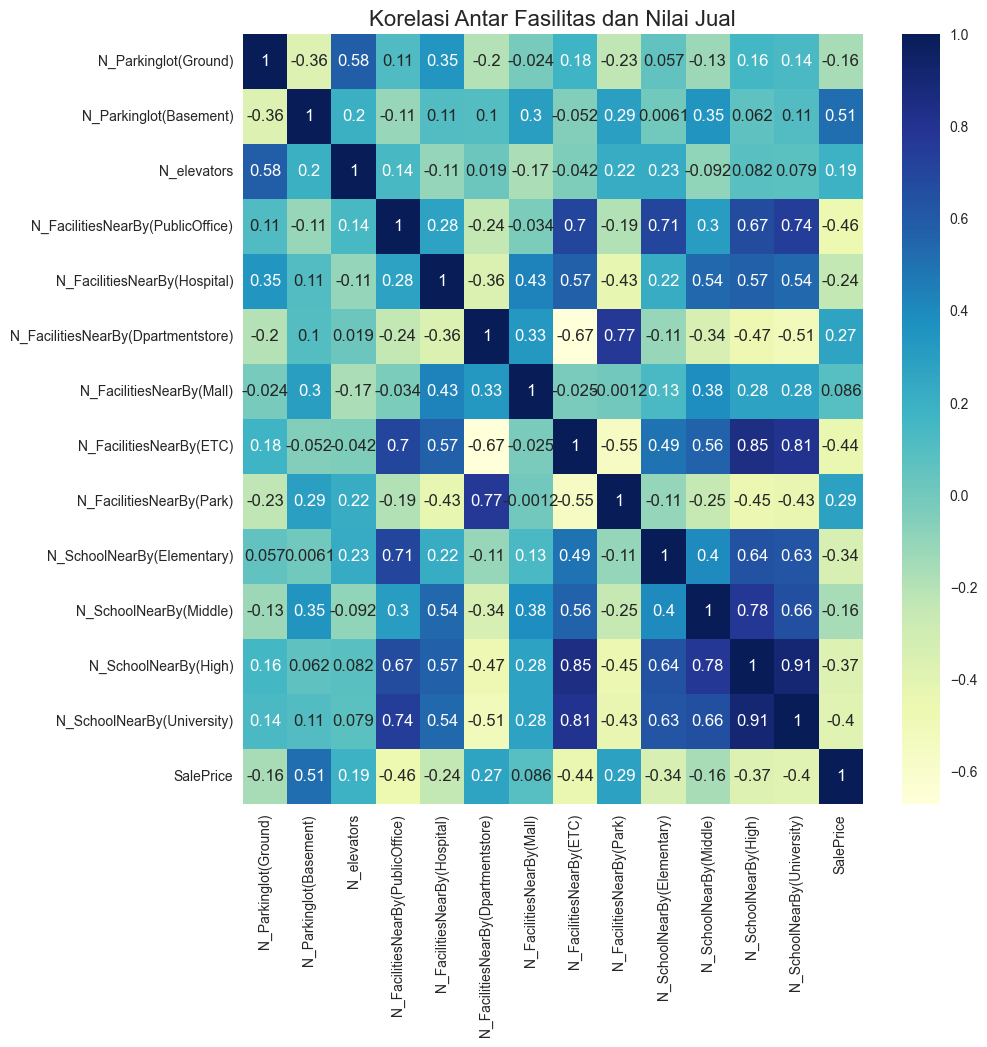

In [246]:
plt.subplots(figsize=(10,10))
corr = df_facilities.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title(
    "Korelasi Antar Fasilitas dan Nilai Jual", 
    fontsize = 16,
)

In [247]:
# correlation between Price
print("Nilai korelasi pearson antara variabel fasilitas dengan harga jual:")
df_facilities.corr()['SalePrice']

Nilai korelasi pearson antara variabel fasilitas dengan harga jual:


N_Parkinglot(Ground)                 -0.157411
N_Parkinglot(Basement)                0.512651
N_elevators                           0.187668
N_FacilitiesNearBy(PublicOffice)     -0.457751
N_FacilitiesNearBy(Hospital)         -0.242544
N_FacilitiesNearBy(Dpartmentstore)    0.265402
N_FacilitiesNearBy(Mall)              0.086453
N_FacilitiesNearBy(ETC)              -0.443271
N_FacilitiesNearBy(Park)              0.285263
N_SchoolNearBy(Elementary)           -0.341954
N_SchoolNearBy(Middle)               -0.156853
N_SchoolNearBy(High)                 -0.372770
N_SchoolNearBy(University)           -0.395148
SalePrice                             1.000000
Name: SalePrice, dtype: float64

**Insights** <br/>
> Berdasarkan correlation map antar variabel dan daftar nilai korelasi pearson variabel-variabel fasilitas dengan harga jual, variabel yang memiliki nilai korelasi tertinggi terhadap SalePrice adalah fasilitas parkir bertipe basement dengan nilai korelasi sebesar 0.51. Selain itu, fasilitas yang berada dekat dengan apartemen yang memiliki korelasi tertinggi adalah fasilitas kantor publik dan fasilitas lainnya dengan nilai korelasi sebesar -0.46 dan -0.44. <br>
> Fasilitas sekolah tidak terlalu berpengaruh terhadap nilai jual dari suatu apartemen.<br>
> Kesimpulan yang bisa didapatkan adalah bahwa jumlah fasilitas parkir bertipe basement berpengaruh secara positif atau berbanding lurus dengan harga jual apartemen, sedangkan jumlah fasilitas kantor publik dan fasilitas lainnya justru berbanding terbalik dengan harga jual apartemen.

### Perbedaan Harga Apartemen yang Dibangun Setelah dan Sebelum Tahun 2000

> Bar Chart dipilih karena memiliki fungsionalitas yang lebih baik dalam melakukan visualisasi data yang berbasis perbandingan antara dua variabel. Pada konteks EDA kali ini, variabel yang dimaksud adalah harga setelah tahun 2000 dan sebelum tahun 2000.

In [248]:
# Copy SalePrice and YearBuilt columns from daegu df for EDA
pr_yr_df = daegu_df[['SalePrice', 'YearBuilt']].copy()

# Group Data By YearBuilt
by_year_pr = pr_yr_df.groupby(pr_yr_df['YearBuilt'], as_index=False).mean()

# Create YearCategory column to indicate whether the apartment was built before or after 2000
by_year_pr['YearCategory'] = by_year_pr.apply(
                                lambda x: ">= 2000" if x['YearBuilt'] >= 2000 else "< 2000", 
                                axis=1
                            )
by_year_pr.head()

,YearBuilt,SalePrice,YearCategory
0,1978,168846.250000,< 2000
1,1980,71681.000000,< 2000
2,1985,77598.661290,< 2000
3,1986,181114.230769,< 2000
4,1992,96358.477419,< 2000


In [249]:
# Plot bar chart for YearCategory Visualization
fig = px.bar(
    by_year_pr, 
    x="YearBuilt", 
    y="SalePrice", 
    color="YearCategory",
    title="Perbandingan Harga Apartemen Sebelum dan Sesudah Tahun 2000")

fig.update_layout({
    "paper_bgcolor":'rgba(255,255,255,1)',
    "plot_bgcolor":'rgba(255,255,255,1)'
})

fig.update_xaxes(showline=True, linewidth=1.5, linecolor='grey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1.5, linecolor='grey')

fig.show()

In [250]:
# Group Data by YearCategory
temp_df = by_year_pr.drop("YearBuilt", axis = 1)
by_year_cat_pr = temp_df.groupby(temp_df['YearCategory'], as_index=False).mean()

# Plot Bar chart for YearCategory Visualization based by YearCategory
fig = px.bar(
    by_year_cat_pr, 
    x="YearCategory", 
    y="SalePrice", 
    color="YearCategory",
    text_auto='s',
    title="Perbandingan Harga Apartemen Sebelum dan Sesudah Tahun 2000")
    
fig.update_layout({
    "paper_bgcolor":'rgba(255,255,255,1)',
    "plot_bgcolor":'rgba(255,255,255,1)'
})

fig.update_xaxes(showline=True, linewidth=1.5, linecolor='grey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1.5, linecolor='grey')

fig.show()

**Insights** <br/>
> Berdasarkan grafik pertama, kita dapat melihat bahwa rata-rata harga apartemen yang dibangun sebelum tahun 2000 berada di kisaran paling rendah 71 ribu pada tahun 1980 hingga paling tinggi 181 ribu pada tahun 1986. Rentang rata-rata harga tersebut cenderung `lebih rendah` jika dibandingkan rentang rata-rata harga apartemen yang dibangun setelah tahun 2000 yang berada di kisaran paling rendah 134 ribu pada tahun 2003 hingga paling tinggi 348 ribu pada tahun 2015. Dari grafik pertama, kita juga dapat melihat bahwa semakin baru tahun pembuatan apartemen, harga penjualan juga cenderung meningkat. Untuk grafik kedua, kita dapat mengetahui generalisasi dari grafik pertama. Dapat dilihat bahwa rata-rata harga apartemen yang dibangun sebelum tahun 2000, yaitu sebesar 121 ribu, lebih rendah dibanding rata-rata harga apartemen yang dibangun setelah atau pada tahun 2000, yaitu sebesar 243 ribu. Namun, generalisasi ini belum tentu akurat karena data harga apartemen per tahun bangun yang dibangun setelah atau pada tahun 2000 lebih banyak, yakni ada 9 data, jika dibandingkan dengan data harga apartemen per tahun bangun yang dibangun sebelum tahun 2000, yakni hanya ada 7 data.

### Waktu Tertentu Ketika Penjualan Apartemen Lebih Tinggi Dari Biasanya

In [251]:
penjualan_tahun = daegu_df.groupby(['YrSold']).size().rename('penjualan').reset_index()
data_penjualan_tahun = pd.DataFrame(penjualan_tahun)
data_penjualan_tahun

,YrSold,penjualan
0,2007,112
1,2008,362
2,2009,508
3,2010,525
4,2011,545
5,2012,449
6,2013,568
7,2014,637
8,2015,540
9,2016,592


In [252]:
fig = px.line(
    penjualan_tahun, 
    x="YrSold", 
    y="penjualan", 
    title="Grafik penjualan apartemen per tahun")
fig.show()

Pertama, ketika kita lihat perbandingan jumlah penjualan pertahun, maka dapat dilihat bahwa pada tahun 2014 penjualan yang terjadi terlihat paling tinggi di banding tahun-tahun lainnya.

In [253]:
penjualan_bulan = daegu_df.groupby(['MonthSold']).size().rename('penjualan').reset_index()
data_penjualan_bulan = pd.DataFrame(penjualan_bulan)
data_penjualan_bulan

,MonthSold,penjualan
0,1,467
1,2,415
2,3,570
3,4,430
4,5,477
5,6,493
6,7,516
7,8,447
8,9,370
9,10,487


### 

In [254]:
fig = px.line(
    penjualan_bulan, 
    x="MonthSold", 
    y="penjualan", 
    title="Grafik penjualan apartemen per bulan")
fig.show()

Selanjutnya, apabila dilihat dari data penjualan yang terjadi pada setiap bulan, penjualan pada bulan Maret menyentuh data penjualan yang tertinggi dibandingkan bulan-bulan lainnya. 

In [255]:
penjualan_tahun_bulan = daegu_df.groupby(['YrSold', 'MonthSold']).size().rename('penjualan').reset_index()
data_penjualan_tahun_bulan = pd.DataFrame(penjualan_tahun_bulan)
data_penjualan_tahun_bulan

,YrSold,MonthSold,penjualan
0,2007,8,12
1,2007,9,17
2,2007,10,24
3,2007,11,37
4,2007,12,22
...,...,...,...
116,2017,4,51
117,2017,5,64
118,2017,6,99
119,2017,7,143


In [256]:
col = "penjualan"
max_penjualan = penjualan_tahun_bulan.loc[penjualan_tahun_bulan[col].idxmax()]
print("Nilai tertinggi penjualan tertinggi adalah", max_penjualan['penjualan'], "pada tahun", max_penjualan['YrSold'], "dan bulan", max_penjualan['MonthSold'])

print('Detail 5 penjualan tertinggi')
top_penjualan = penjualan_tahun_bulan.nlargest(n=5, columns=['penjualan'])
top_penjualan

Nilai tertinggi penjualan tertinggi adalah 143 pada tahun 2017 dan bulan 7
Detail 5 penjualan tertinggi


,YrSold,MonthSold,penjualan
119,2017,7,143
101,2016,1,106
118,2017,6,99
69,2013,5,79
68,2013,4,78


In [257]:
mean_penjualan = penjualan_tahun_bulan['penjualan'].mean()
median_penjualan = penjualan_tahun_bulan['penjualan'].median()
print("rata_rata penjualan per periode bulan dan tahun", mean_penjualan)
print("median penjualan per periode bulan dan tahun", median_penjualan)

rata_rata penjualan per periode bulan dan tahun 44.82644628099174
median penjualan per periode bulan dan tahun 42.0


Berdasarkan tabel di atas, dapat dilihat bahwa lima penjualan tertinggi ada pada Juli 2017 dengan 147 penjualan, Januari 2016 dengan 106 penjualan, Juni 2017 dengan 101 penjualan, April 2013 dengan 82 penjualan, dan Mei 2013 dengan 80 penjualan. Apabila dibandingkan dengan rata-rata dan median penjualan per periode bulan dan tahun, maka dapat dilihat bahwa terdapat waktu dimana penjualan apartemen lebih tinggi dari biasanya, dengan penjualan tertinggi ada pada Juli 2017.

<AxesSubplot: >

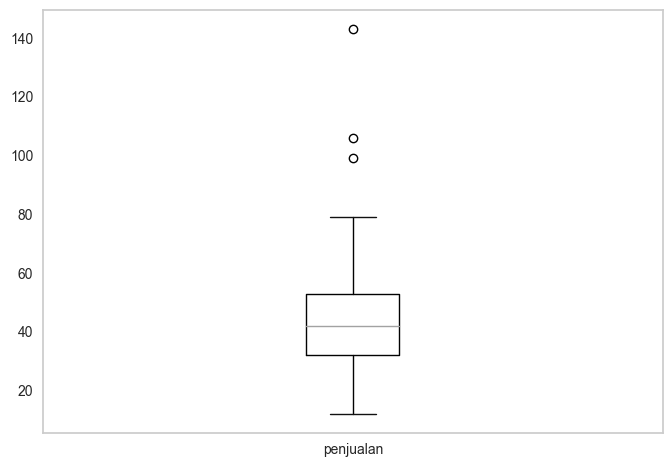

In [258]:
penjualan_tahun_bulan.boxplot(column =['penjualan'], grid = False)

Dari boxplot di atas, dapat dilihat outliers penjualan yang lebih tinggi dari biasanya, yaitu penjualan pada Juli 2017 dengan 147 penjualan, Januari 2016 dengan 106 penjualan, Juni 2017 dengan 101 penjualan. 

### Tren Perubahan Harga Penjualan Apartemen dari Tahun ke Tahun!

Untuk melihat tren perubahan harga penjualan apartemen dari tahun ke tahun, kita akan menggunakan data harga jual rata-rata apartemen per tahunnya, lalu akan divisualisasikan dengan barplot sehingga lebih mudah bagi kita untuk menganalisis trennya.

In [259]:
harga_tahunan = daegu_df.groupby('YearBuilt')['SalePrice'].mean().rename('Harga rata-rata').reset_index()
display(harga_tahunan)
harga_tahunan.set_index('YearBuilt', inplace=True)

,YearBuilt,Harga rata-rata
0,1978,168846.250000
1,1980,71681.000000
2,1985,77598.661290
3,1986,181114.230769
4,1992,96358.477419
5,1993,160691.246554
6,1997,95507.323810
7,2003,134021.111111
8,2005,181181.761146
9,2006,248300.294393


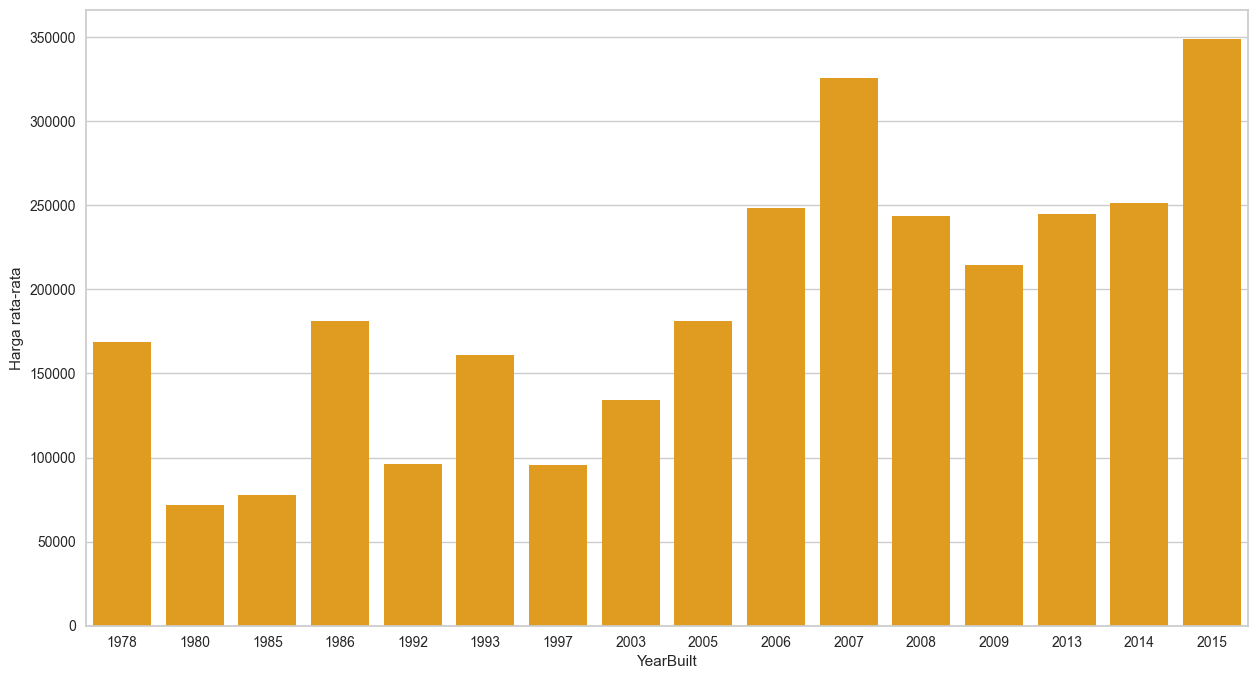

In [260]:
plt.figure(figsize=(15, 8))
sns.barplot(
    x= harga_tahunan.index,
    y='Harga rata-rata',  
    data=harga_tahunan,
    color='orange'
)
plt.show()

Berdasarkan barplot di atas, kita langsung dapat menyimpulkan tren perubahan harga penjualan apartemen dari tahun ke tahun, yaitu tren bergerak turun pada periode 1978-1980, lalu bergerak naik pada periode 1980-1986, kemudian bergerak turun pada periode 1986-1992, lalu bergerak naik pada periode 1992-1993, kemudian bergerak turun pada periode 1993-1997, lalu bergerak naik pada periode 1997-2007, kemudian bergerak turun pada periode 2007-2009, dan bergerak naik pada periode 2009-2015.

Jika kita melihat barplot di atas dengan timeframe yang panjang, dapat disimpulkan bahwa tren perubahan harga penjualan apartemen dari tahun 1978-2015 terus bergerak naik. Hal ini tentunya sesuai dengan realita di kehidupan bahwa harga tanah/bangunan (properti) akan terus naik karena jumlah tanah tidak bisa bertambah, sedangkan jumlah manusia terus bertambah. Ini artinya permintaan/kebutuhan akan properti akan semakin banyak, sedangkan persediaan tanah akan semakin sedikit, sehingga menyebabkan harga akan terus naik, namun harga tetap bisa turun dalam timeframe yang kecil, misalnya 1-2 tahun.

### Korelasi Banyak Fasilitas dan Instansi Pendidikan Terdekat terhadap Apartemen Family Friendly

> Heatmap dipilih karena memiliki fungsionalitas yang lebih baik dalam melakukan visualisasi data yang berbasis korelasi. Pada konteks kali ini, kami menggunakan metode korelasi Point Biserial karena dapat membandingkan data numerik (banyak fasilitas dan instansi pendidikan) dengan data dikotomi (Family Friendly dan Non Family Friendly).

In [261]:
# Select facility and school columns
facilities_col = [i for i in temp_clean.columns.tolist() if 'N_FacilitiesNearBy' in i]
facilities_col.remove('N_FacilitiesNearBy(Total)')

school_col = [i for i in temp_clean.columns.tolist() if 'N_SchoolNearBy' in i]
school_col.remove('N_SchoolNearBy(Total)')

data_corr = temp_clean[facilities_col + school_col]
data_corr

,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University)
0,2,1,1,1,1,0,3,2,2,2
1,5,1,2,1,2,1,2,1,1,0
2,5,1,2,1,2,1,2,1,1,0
4,6,2,0,1,5,0,4,3,5,5
5,7,1,1,1,5,1,4,3,5,5
...,...,...,...,...,...,...,...,...,...,...
5886,3,1,2,1,0,2,3,3,2,2
5887,3,1,1,1,2,0,4,3,3,1
5888,3,1,2,1,0,2,3,3,2,2
5889,3,2,1,1,0,0,3,3,3,2


In [262]:
# Calculate Point Biserial Correlation for and school columns
from scipy.stats import pointbiserialr

_corr = list()
for col in data_corr.columns:
    biserial_corr = pointbiserialr(data_corr[col], temp_clean["FamilyFriendly"])
    print(f"Hasil Pvalues {col}:", "Signifikan" if biserial_corr[0] < 0.05 else "Tidak Signifikan")
    _corr.append(biserial_corr[0])

corr_df = pd.DataFrame(_corr, index=data_corr.columns)
corr_df.columns = ["FamilyFriendly"]

corr_df

Hasil Pvalues N_FacilitiesNearBy(PublicOffice): Signifikan
Hasil Pvalues N_FacilitiesNearBy(Hospital): Signifikan
Hasil Pvalues N_FacilitiesNearBy(Dpartmentstore): Tidak Signifikan
Hasil Pvalues N_FacilitiesNearBy(Mall): Signifikan
Hasil Pvalues N_FacilitiesNearBy(ETC): Signifikan
Hasil Pvalues N_FacilitiesNearBy(Park): Tidak Signifikan
Hasil Pvalues N_SchoolNearBy(Elementary): Signifikan
Hasil Pvalues N_SchoolNearBy(Middle): Signifikan
Hasil Pvalues N_SchoolNearBy(High): Signifikan
Hasil Pvalues N_SchoolNearBy(University): Signifikan


,FamilyFriendly
N_FacilitiesNearBy(PublicOffice),-0.058125
N_FacilitiesNearBy(Hospital),-0.244547
N_FacilitiesNearBy(Dpartmentstore),0.268901
N_FacilitiesNearBy(Mall),-0.229979
N_FacilitiesNearBy(ETC),-0.245708
N_FacilitiesNearBy(Park),0.406650
N_SchoolNearBy(Elementary),-0.092240
N_SchoolNearBy(Middle),-0.295887
N_SchoolNearBy(High),-0.295242
N_SchoolNearBy(University),-0.332190


Text(0.5, 1.06, 'Korelasi Linear Banyak Fasilitas dan Instansi Pendidikan Terdekat Terhadap Family Friendly')

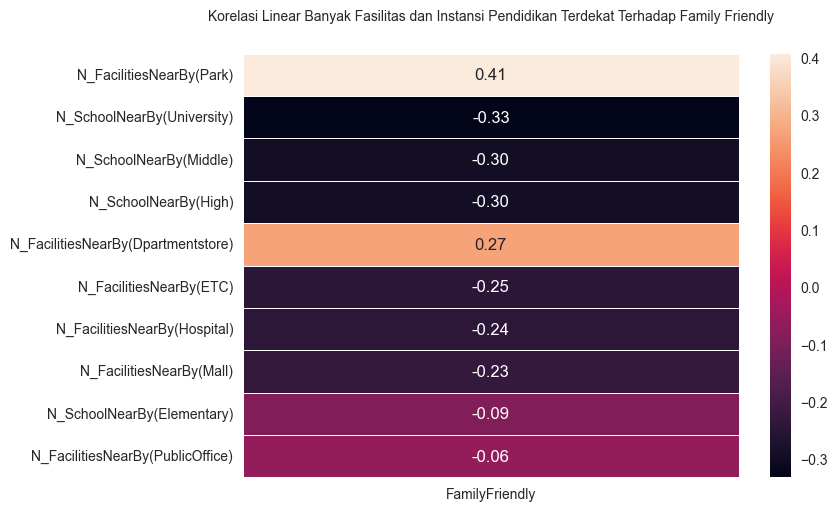

In [263]:
# Sort Point Biserial Correlation for facility and school columns
heatmap_data = corr_df\
                .sort_values(by='FamilyFriendly', key=abs, ascending=False)

# Visualize the Heatmap
sns.heatmap(heatmap_data, annot=True, linewidths=.5, fmt= '.2f')
plt.title(
    "Korelasi Linear Banyak Fasilitas dan Instansi Pendidikan Terdekat Terhadap Family Friendly", 
    fontsize = 10,
    y=1.06
)

**Insights** <br/>
- Fasilitas yang paling berkorelasi secara linear adalah taman dengan korelasi positif. Dengan kata lain, semakin banyak taman terdekat, semakin besar kemungkinan apartemen tergolong family friendly dan apartemen yang tergolong family friendly cenderung memiliki banyak taman.
- Instansi pendidikan yang paling berkorelasi secara linear adalah universitas dengan korelasi negatif. Dengan kata lain, semakin banyak universitas, semakin kecil kemungkinan apartemen tergolong family friendly dan apartemen yang tergolong family friendly cenderung memiliki sedikit universitas.
- Terlihat dari p values yang dihasilkan oleh point biserial,semua korelasi sekolah terdekat dengan family friendly tergolong signifikan. Dengan kata lain, terdapat perbedaan rata-rata banyak sekolah terdekat yang signifikan antara apartemen yang family friendly dan non family friendly. Untuk fasilitas terdekat, banyak kantor publik, mall, rumah sakit, dan fasilitas lainnya cenderung lebih signifikan jika dibandingkan antara apartemen yang family friendly dan non family friendly.

### Distribusi Biaya Penjualan Apartemen per Sqft Untuk Tiap Tipe Hallway

> Violin plot dipilih karena memiliki fungsionalitas yang baik dalam melakukan visualisasi data yang berbasis distribusi antara dua variabel secara menyeluruh. Pada konteks EDA kali ini, variabel yang dimaksud adalah tipe Hallway dan Biaya Penjualan Apartemen per Sqft.

In [264]:
# Copy columns needed for the problem
pr_mgmt_apt_df = temp_clean[['SalePrice', 'HallwayType', 'Size(sqf)']].copy()

pr_mgmt_apt_df['PricePerSqft'] = pr_mgmt_apt_df['SalePrice'] / pr_mgmt_apt_df['Size(sqf)']
pr_mgmt_apt_df = pr_mgmt_apt_df.drop(['SalePrice', 'Size(sqf)'], axis = 1)\

pr_mgmt_apt_df

,HallwayType,PricePerSqft
0,terraced,173.945946
1,corridor,87.439523
2,corridor,82.916525
4,mixed,125.632027
5,corridor,100.957746
...,...,...
5886,terraced,311.323189
5887,terraced,330.265781
5888,terraced,411.891705
5889,corridor,235.409947


In [265]:
# Visualize violin plot
fig = px.violin(
    pr_mgmt_apt_df, 
    x="HallwayType", 
    y="PricePerSqft",
    box=True,
    title="Distribusi Biaya Penjualan Apartemen per Sqft Untuk Tiap Tipe Hallway"
)

fig.update_layout({
    "paper_bgcolor":'rgba(255,255,255,1)',
    "plot_bgcolor":'rgba(255,255,255,1)'
})

fig.update_xaxes(showline=True, linewidth=1.5, linecolor='grey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1.5, linecolor='grey')

fig.show()

**Insights** <br/>
- Harga penjualan apartemen per square feet bervariasi pada masing-masing tipe lorong, misal tipe teras yang cenderung terdistribusi pada 200-300, tipe koridor yang cenderung terdistribusi pada 100-200, dan tipe campuran teras dan koridor cenderung terdistribusi pada 100-200.
- Tipe lorong teras cenderung memiliki harga jual yang lebih mahal dibandingkan tipe lorong lainnya.
- Tipe campuran teras dan koridor lebih terdistribusi secara merata dibandingkan tipe lainnya yang masih memiliki outlier normal.

## Modelling

### Regression

Menentukan data yang akan digunakan dan proses pembuatan fitur target, yaitu price per square feet.

In [266]:
X = daegu_df.iloc[:, 1:42]

# Create new variable: Price per size (square feet)
size_unit = daegu_df.iloc[:, 0]
daegu_df["price_per_sqf"] = daegu_df['SalePrice']/daegu_df['Size(sqf)']
y = daegu_df["price_per_sqf"]

df_reg = X.join(y)

#### Feature Selection

Menggunakan metode korelasi, yaitu menggunakan variabel yang memiliki korelasi tinggi dengan variabel target dan menghapus variabel yang memiliki korelasi tinggi dengan variabel lainnya.

In [267]:
# Correlation with the output variable
corr = df_reg.corr()
cor_target = abs(corr["price_per_sqf"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
print("Variabel-variabel yang memiliki korelasi tinggi dengan variabel target:")
relevant_features

Variabel-variabel yang memiliki korelasi tinggi dengan variabel target:


YearBuilt            0.671869
YrSold               0.691931
N_FacilitiesInApt    0.518919
price_per_sqf        1.000000
Name: price_per_sqf, dtype: float64

In [268]:
# Identification of correlation among variable selected above
# The identification is done by manually observing the correlation values among variable pairs
print(df_reg[["YearBuilt","YrSold"]].corr())
print(df_reg[["N_FacilitiesInApt","YearBuilt"]].corr())
print(df_reg[["N_FacilitiesInApt","YrSold"]].corr())

           YearBuilt   YrSold
YearBuilt    1.00000  0.24496
YrSold       0.24496  1.00000
                   N_FacilitiesInApt  YearBuilt
N_FacilitiesInApt           1.000000   0.594401
YearBuilt                   0.594401   1.000000
                   N_FacilitiesInApt    YrSold
N_FacilitiesInApt           1.000000  0.211435
YrSold                      0.211435  1.000000


> Berdasarkan hasil analisis nilai korelasi variabel dengan variabel target, didapatkan bahwa terdapat tiga buah variabel yang memiliki korelasi tinggi dengan nilai jual, yaitu tahun bangun, tahun terjual dan jumlah fasilitas yang berada dalam apartemen. Selanjutnya, berdasarkan hasil analisis antara variabel tersebut, ditemukan bahwa variabel N_FacilitiesInApt dan YrSold memiliki korelasi yang tergolong tinggi sehingga variabel N_FacilitiesInApt akan di drop karena memiliki korelasi yang lebih rendah dengan variabel target.

In [269]:
X = X.drop(columns=['N_FacilitiesInApt'])

Menggunakan metode Lasso (least absolute shrinkage and selection operator) untuk meningkatkan performa dari model.

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [271]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [272]:
lasso_feat = Lasso(alpha=1)
lasso_feat.fit(X_train, y_train)

Lasso(alpha=1)

Feature: 0, Score: 102.21020
Feature: 1, Score: 150.89463
Feature: 2, Score: 11.11493
Feature: 3, Score: -47.69485
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: 38.90835
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: -5.28404
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -2.73328
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: -6.64279
Feature: 23, Score: -4.62109
Feature: 24, Score: 29.87373
Feature: 25, Score: -0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: -0.00000
Feature: 29, Score: -0.00000
Feature: 30, Score: -0.00000
Feature: 31, Score: 14.84452
Feature: 32, Score: -0.00000
Feature: 33, Score: 5.52869
Feature: 34, Score: -0.00000


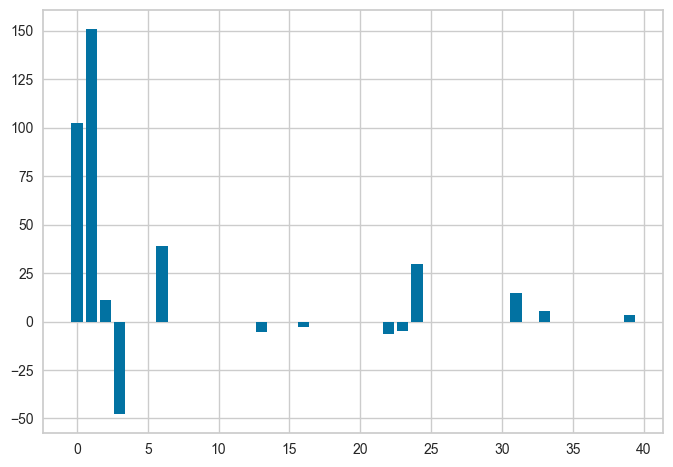

In [273]:
# Show each feature importance value and save the important value
importance = lasso_feat.coef_
listFitur = []
for i,v in enumerate(importance):
    if (abs(v)> 0.2):
        listFitur += [i]
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [274]:
# Create new predictor variable dataframe from the selected features
X = X.iloc[:, listFitur]

Berikut ini adalah daftar fitur yang terpilih berdasarkan metode korelasi dan metode lasso.

In [275]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 0 to 5890
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YearBuilt                       5424 non-null   int64  
 1   YrSold                          5424 non-null   int64  
 2   MonthSold                       5424 non-null   int64  
 3   Size(sqf)                       5424 non-null   int64  
 4   N_Parkinglot(Basement)          5424 non-null   int64  
 5   N_FacilitiesNearBy(Mall)        5424 non-null   int64  
 6   N_SchoolNearBy(Elementary)      5424 non-null   int64  
 7   FamilyFriendly                  5424 non-null   float64
 8   HallwayType_mixed               5424 non-null   uint8  
 9   HallwayType_terraced            5424 non-null   uint8  
 10  TimeToSubway_5min~10min         5424 non-null   uint8  
 11  SubwayStation_Banwoldang        5424 non-null   uint8  
 12  SubwayStation_no_subway_nearby  54

#### Model Training and Testing

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. Linear Regression Model

In [277]:
linear = LinearRegression()

# create a KFold object with 5 folds
kfold = KFold(n_splits=10)

# use the KFold object to split the training data into training and validation sets
for train_index, val_index in kfold.split(X_train):
    # get the training and validation data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # fit the model on the training data
    linear.fit(X_train_fold, y_train_fold)

    # evaluate the model on the validation data
    score = linear.score(X_val_fold, y_val_fold)
    print(f"Validation score: {score:.3f}")

Validation score: 0.826
Validation score: 0.820
Validation score: 0.806
Validation score: 0.823
Validation score: 0.831
Validation score: 0.816
Validation score: 0.845
Validation score: 0.820
Validation score: 0.812
Validation score: 0.845


In [278]:
# predict test data
y_linear_predict = linear.predict(X_test)
y_linear_predict

array([310.0715165 , 304.09414709, 332.79099942, ..., 257.88057532,
       187.39673515, 362.01679863])

Berikut ini adalah perbandingan hasil prediksi dengan nilai aktual

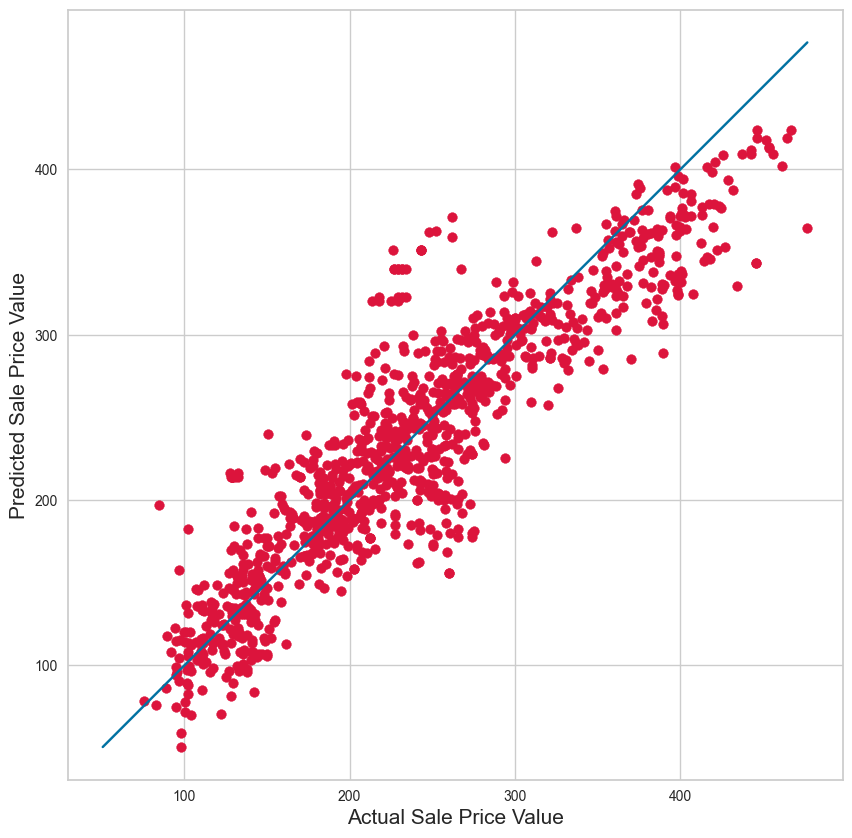

In [279]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_linear_predict, c='crimson')

p1 = max(max(y_linear_predict), max(y_test))
p2 = min(min(y_linear_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sale Price Value', fontsize=15)
plt.ylabel('Predicted Sale Price Value', fontsize=15)
plt.axis('equal')
plt.show()

In [280]:
print("Evaluation Metrics For Linear Regression Model:")
print('MAE: %.3f' % mean_absolute_error(y_test, y_linear_predict))
print('MSE: %.3f' % mean_squared_error(y_test, y_linear_predict))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test, y_linear_predict)))
print('R-Squared: %.7f' % r2_score(y_test, y_linear_predict))

Evaluation Metrics For Linear Regression Model:
MAE: 26.164
MSE: 1261.095
RMSE: 35.512
R-Squared: 0.8285180


> Hasil evaluasi menunjukkan bahwa model mampu menjelaskan sekitar 82.85% variability dari target variable. Nilai ini sudah tergolong baik untuk model linear regression. Selain itu, didapatkan nilai mean absolute error sebesar 26.164, mean squared error sebesar 1261.01, dan root mean squared error sebesar 35.51.

In [281]:
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [  72.18754589  156.77559957   26.69827668 -119.21928362   78.07233922
  -57.62093299  -37.62219295  -19.01536998   -6.57855966   34.6944246
   13.12995789   33.51191515    0.94076178]
Intersep persamaan linear: 
 122.13956093627532


> Persamaan linear yang didapatkan adalah price_per_sqf = 121.14 + 72.18 * YearBuilt + 156.78 * YrSold + 26.70 * Size(sqf) -119.22 * N_parkingLot(basement) + 78.1 * N_FacilitiesNearby(Mall) + ...

2. Ridge Regression model

In [282]:
ridge = Ridge(alpha=1)
# use the KFold object to split the training data into training and validation sets
for train_index, val_index in kfold.split(X_train):
    # get the training and validation data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # fit the model on the training data
    ridge.fit(X_train_fold, y_train_fold)

    # evaluate the model on the validation data
    score = ridge.score(X_val_fold, y_val_fold)
    print(f"Validation score: {score:.3f}")

Validation score: 0.826
Validation score: 0.820
Validation score: 0.806
Validation score: 0.823
Validation score: 0.831
Validation score: 0.816
Validation score: 0.845
Validation score: 0.820
Validation score: 0.812
Validation score: 0.844


In [283]:
y_ridge_predict = ridge.predict(X_test)
y_ridge_predict

array([309.9402323 , 304.10336592, 332.3544269 , ..., 257.89331406,
       187.85289994, 361.77471499])

Berikut ini adalah perbandingan hasil prediksi dengan nilai aktual

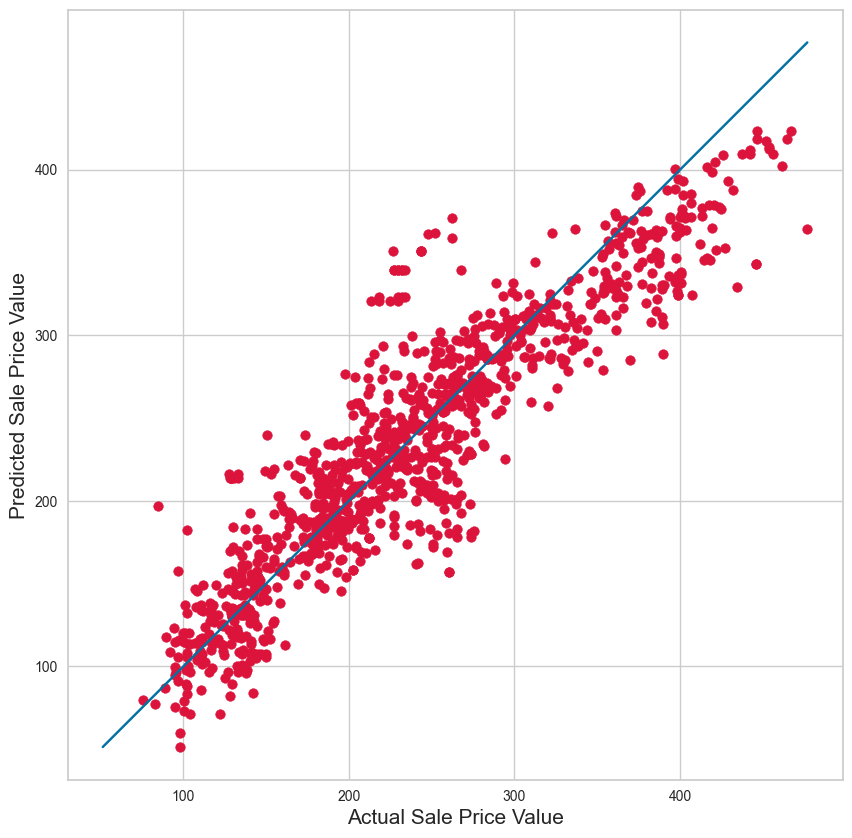

In [284]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_ridge_predict, c='crimson')

p1 = max(max(y_ridge_predict), max(y_test))
p2 = min(min(y_ridge_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sale Price Value', fontsize=15)
plt.ylabel('Predicted Sale Price Value', fontsize=15)
plt.axis('equal')
plt.show()

In [285]:
print("Evaluation Metrics For Ridge Regression Model:")
print('MAE: %.3f' % mean_absolute_error(y_test, y_ridge_predict))
print('MSE: %.3f' % mean_squared_error(y_test, y_ridge_predict))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test, y_ridge_predict)))
print('R-Squared: %.7f' % r2_score(y_test, y_ridge_predict))

Evaluation Metrics For Ridge Regression Model:
MAE: 26.187
MSE: 1260.607
RMSE: 35.505
R-Squared: 0.8285844


> Hasil evaluasi menunjukkan bahwa model mampu menjelaskan sekitar 82.86% variability dari target variable. Nilai ini sudah tergolong baik untuk model ridge regression. Selain itu, didapatkan nilai mean absolute error sebesar 26.187, mean squared error sebesar 1260.61, dan root mean squared error sebesar 35.51.

In [286]:
print("Koefisien persamaan linear: \n", ridge.coef_)
print("Intersep persamaan linear: \n", ridge.intercept_)

Koefisien persamaan linear: 
 [  72.48009487  156.37674299   26.51363658 -117.36534541   77.41233522
  -56.70267207  -36.96481866  -19.01559178   -6.79929072   34.56570722
   13.39277701   33.04097889    1.29300419]
Intersep persamaan linear: 
 121.2072926923055


> Persamaan linear yang didapatkan adalah price_per_sqf = 121.21 + 72.48 * YearBuilt + 156.38 * YrSold + 26.51 * Size(sqf) -117.36 * N_parkingLot(basement) + 77.41 * N_FacilitiesNearby(Mall) + ...

3. Lasso Regression Model

In [287]:
lasso = Lasso(alpha=0.5)
# use the KFold object to split the training data into training and validation sets
for train_index, val_index in kfold.split(X_train):
    # get the training and validation data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # fit the model on the training data
    lasso.fit(X_train_fold, y_train_fold)

    # evaluate the model on the validation data
    score = lasso.score(X_val_fold, y_val_fold)
    print(f"Validation score: {score:.3f}")

Validation score: 0.816
Validation score: 0.812
Validation score: 0.798
Validation score: 0.819
Validation score: 0.823
Validation score: 0.804
Validation score: 0.835
Validation score: 0.808
Validation score: 0.808
Validation score: 0.836


In [288]:
y_lasso_predict = lasso.predict(X_test)
y_lasso_predict

array([308.77651867, 307.92117649, 313.24503096, ..., 248.06083834,
       200.93522533, 360.14357062])

Berikut ini adalah perbandingan hasil prediksi dengan nilai aktual

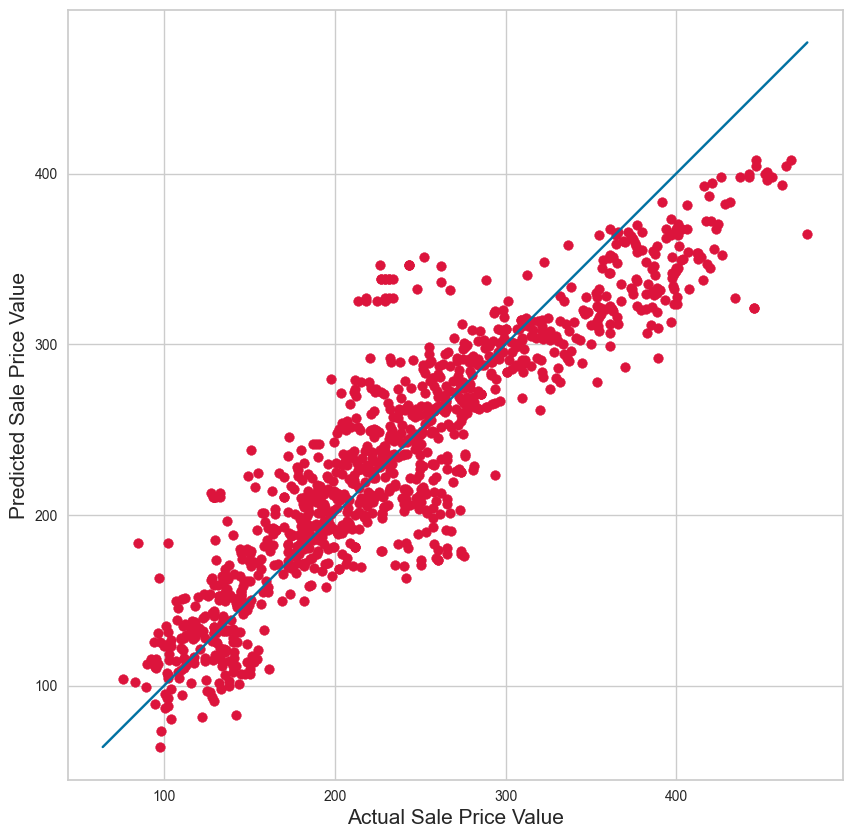

In [289]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_lasso_predict, c='crimson')

p1 = max(max(y_lasso_predict), max(y_test))
p2 = min(min(y_lasso_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sale Price Value', fontsize=15)
plt.ylabel('Predicted Sale Price Value', fontsize=15)
plt.axis('equal')
plt.show()

In [290]:
print("Evaluation Metrics For Lasso Regression Model:")
print('MAE: %.3f' % mean_absolute_error(y_test, y_lasso_predict))
print('MSE: %.3f' % mean_squared_error(y_test, y_lasso_predict))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test, y_lasso_predict)))
print('R-Squared: %.7f' % r2_score(y_test, y_lasso_predict))

Evaluation Metrics For Lasso Regression Model:
MAE: 27.390
MSE: 1320.988
RMSE: 36.345
R-Squared: 0.8203739


> Hasil evaluasi menunjukkan bahwa model mampu menjelaskan sekitar 82.04% variability dari target variable. Nilai ini sudah tergolong baik untuk model lasso regression. Selain itu, didapatkan nilai mean absolute error sebesar 27.39, mean squared error sebesar 1320.99, dan root mean squared error sebesar 36.34.

In [291]:
print("Koefisien persamaan linear: \n", lasso.coef_)
print("Intersep persamaan linear: \n", lasso.intercept_)

Koefisien persamaan linear: 
 [ 88.10453059 153.29678221  19.80018698 -82.94768666  58.62915606
 -32.25273413 -20.4904162  -12.95320495  -6.05432716  31.71088305
  13.90163668  19.10101674   0.98938448]
Intersep persamaan linear: 
 92.83859129137082


> Persamaan linear yang didapatkan adalah price_per_sqf = 92.84 + 88.1 * YearBuilt + 153.30 * YrSold + 19.80 * Size(sqf) -82.95 * N_parkingLot(basement) + 58.63 * N_FacilitiesNearby(Mall) + ...

4. Random Forest Regression

In [292]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

# Define the hyperparameter values to test
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15]
}

# Create the grid search object
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.9548807313733887


In [293]:
rf_cv = RandomForestRegressor(**grid_search_rf.best_params_)
rf_cv.fit(X_train, y_train)
y_rf_predict = rf_cv.predict(X_test)

Berikut ini adalah perbandingan hasil prediksi dengan nilai aktual

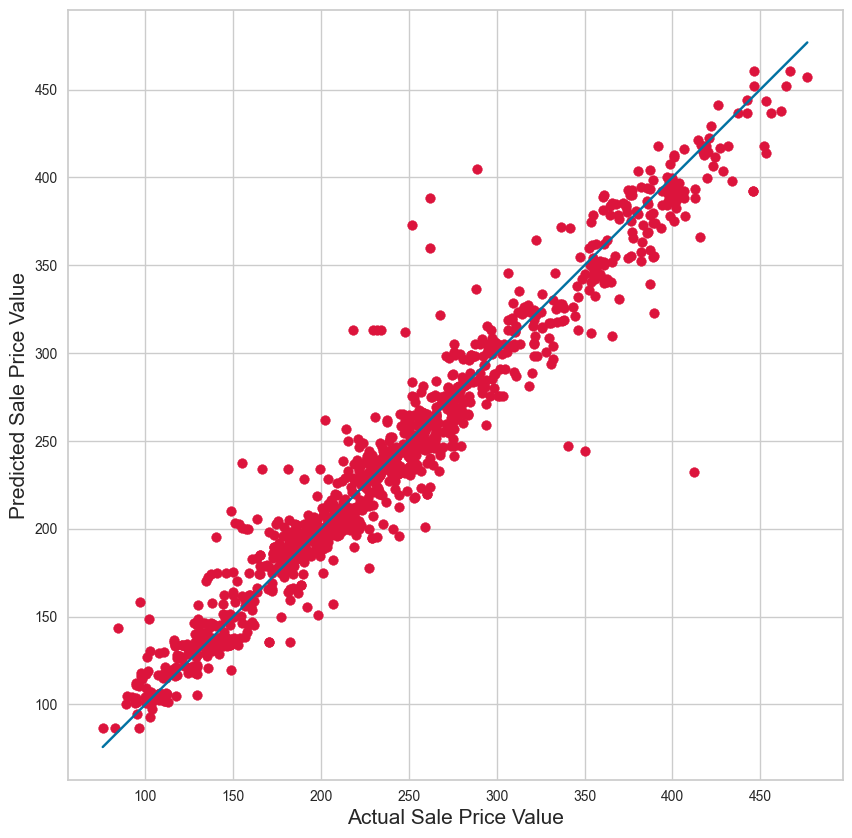

In [294]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_rf_predict, c='crimson')

p1 = max(max(y_rf_predict), max(y_test))
p2 = min(min(y_rf_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sale Price Value', fontsize=15)
plt.ylabel('Predicted Sale Price Value', fontsize=15)
plt.axis('equal')
plt.show()

In [295]:
print("Evaluation Metrics For Random Forest Regression Model:")
print('MAE: %.3f' % mean_absolute_error(y_test, y_rf_predict))
print('MSE: %.3f' % mean_squared_error(y_test, y_rf_predict))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test, y_rf_predict)))
print('R-Squared: %.7f' % r2_score(y_test, y_rf_predict))

Evaluation Metrics For Random Forest Regression Model:
MAE: 12.923
MSE: 392.505
RMSE: 19.812
R-Squared: 0.9466277


> Hasil evaluasi menunjukkan bahwa model mampu menjelaskan sekitar 94.87% variability dari target variable. Nilai ini sudah tergolong sangat baik dan reliable. Selain itu, didapatkan nilai mean absolute error sebesar 12.71, mean squared error sebesar 376.99, dan root mean squared error sebesar 19.42.

5. MLP Regression

In [296]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()

# Define the hyperparameter values to test
param_grid = {
    'hidden_layer_sizes': [3,5,10, 20],
    'alpha': [0.1, 0.3, 0.5],
    'learning_rate_init': [0.01, 0.1, 0.2],
    'activation': ['relu', 'identity']
}
# Create the grid search object
grid_search_nn = GridSearchCV(estimator=mlp_reg, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search_nn.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search_nn.best_params_)
print(grid_search_nn.best_score_)

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 20, 'learning_rate_init': 0.2}
0.879192517128551


In [297]:
mlp_cv = MLPRegressor(**grid_search_nn.best_params_)
mlp_cv.fit(X_train, y_train)
y_mlp_predict = mlp_cv.predict(X_test)

Berikut ini adalah perbandingan hasil prediksi dengan nilai aktual

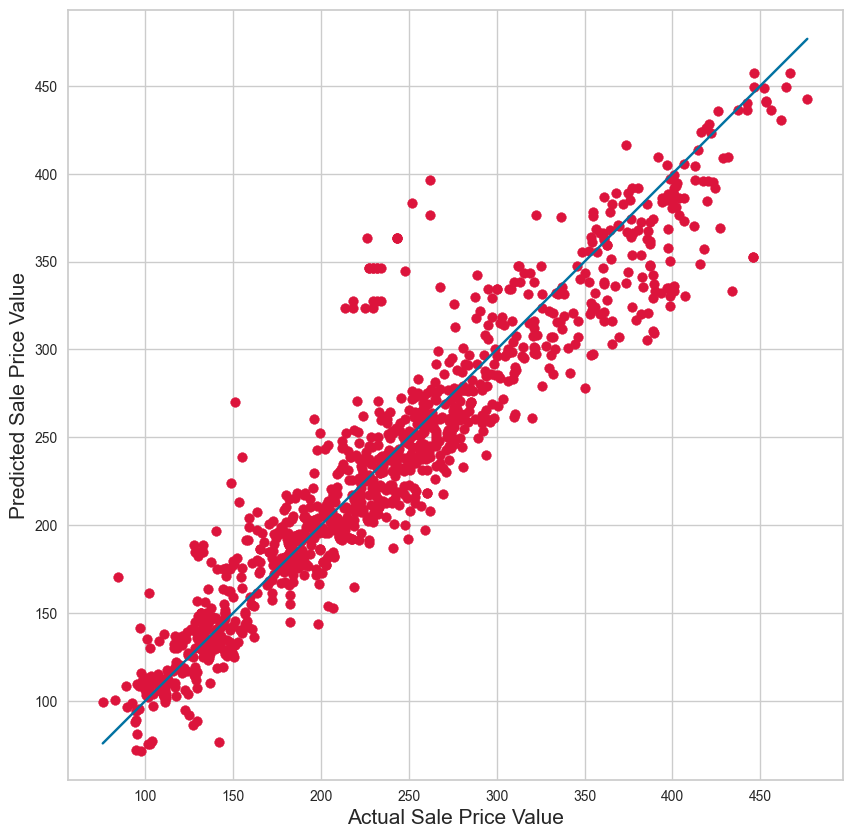

In [298]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_mlp_predict, c='crimson')

p1 = max(max(y_rf_predict), max(y_test))
p2 = min(min(y_rf_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sale Price Value', fontsize=15)
plt.ylabel('Predicted Sale Price Value', fontsize=15)
plt.axis('equal')
plt.show()

In [299]:
print("Evaluation Metrics For MLP Regression Model:")
print('MAE: %.3f' % mean_absolute_error(y_test, y_mlp_predict))
print('MSE: %.3f' % mean_squared_error(y_test, y_mlp_predict))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test, y_mlp_predict)))
print('R-Squared: %.7f' % r2_score(y_test, y_mlp_predict))

Evaluation Metrics For MLP Regression Model:
MAE: 20.157
MSE: 852.784
RMSE: 29.202
R-Squared: 0.8840395


> Hasil evaluasi menunjukkan bahwa model mampu menjelaskan sekitar 82.79% variability dari target variable. Nilai ini sudah tergolong baik untuk model MLP regression. Selain itu, didapatkan nilai mean absolute error sebesar 26.13, mean squared error sebesar 1265.31, dan root mean squared error sebesar 35.57

### Classification


#### Persiapan


In [300]:
# Encode target terlebih dahulu menjadi numerik dengan natural progression (label encoder)
le = LabelEncoder()
daegu_df["FamilyFriendly"] = le.fit_transform(daegu_df["FamilyFriendly"])

X_raw = daegu_df.drop(["FamilyFriendly"],axis=1)
y = daegu_df["FamilyFriendly"]

In [301]:
# Menghitung Komposisi Data
Counter(y)

Counter({0: 4200, 1: 1224})

> Dapat kita lihat dari counter di atas, dataset cenderung memiliki komposisi label 4:1 (label 0 : label 1). Komposisi tersebut tergolong imbalanced karena perbedaan antarkelas cenderung signifikan, yakni hingga 2976. Untuk itu, kita dapat membuat Stratified Sampling dengan StratifiedKFold.

In [302]:
# Mendefinisikan StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [303]:
# Mendefinisikan scaler yang digunakan
scaler = MinMaxScaler()

In [304]:
# Menentukan nilai k terbaik dengan GridSearchCV

# import Grid Search CV
from sklearn.model_selection import GridSearchCV

estimator_knn = Pipeline([
    ('prep',scaler),
    ('clf', KNeighborsClassifier())])

# parameter yang akan di tunning
tunned_params = [
  { 
    'clf__n_neighbors': list(range(1, len(X_raw.columns)+1))
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(estimator_knn, 
                        tunned_params,
                        scoring="roc_auc",
                        cv=kf,
                        verbose = 2
                    )

clfKNN.fit(X_raw, y)

print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END .................................clf__n_neighbors=1; total time=   0.0s
[CV] END .................................clf__n_neighbors=1; total time=   0.0s
[CV] END .................................clf__n_neighbors=1; total time=   0.0s
[CV] END .................................clf__n_neighbors=1; total time=   0.0s
[CV] END .................................clf__n_neighbors=1; total time=   0.0s
[CV] END .................................clf__n_neighbors=2; total time=   0.0s
[CV] END .................................clf__n_neighbors=2; total time=   0.0s
[CV] END .................................clf__n_neighbors=2; total time=   0.0s
[CV] END .................................clf__n_neighbors=2; total time=   0.0s
[CV] END .................................clf__n_neighbors=2; total time=   0.0s
[CV] END .................................clf__n_neighbors=3; total time=   0.0s


In [305]:
# Memilih 6 variable terbaik dari independent variable kita untuk dilatih pada model
selector = SelectKBest(f_classif, k=6) # memilih 6 variable terbaik dari features kita
X = selector.fit_transform(X_raw, y)

In [306]:
# Detail feature apa saja yang kita ambil
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Floor', 'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(University)',
       'N_SchoolNearBy(Total)', 'HallwayType_mixed',
       'HeatingType_individual_heating'], dtype=object)

In [307]:
# Mendefinisikan metriks ukur untuk StratifiedKFold
def evaluate_classifier_performance(str_model, model):
    print(f"Hasil Evaluasi Model {str_model} Untuk Semua Fold")
    print()

    accuracy_score = cross_val_score(model, X, y, cv= kf, scoring="accuracy")
    f1_macro = cross_val_score(model, X, y, cv= kf, scoring="f1_macro")
    f1_micro = cross_val_score(model, X, y, cv= kf, scoring="f1_micro")
    precision_macro = cross_val_score(model, X, y, cv= kf, scoring="precision_macro")
    precision_micro = cross_val_score(model, X, y, cv= kf, scoring="precision_micro")
    recall_macro = cross_val_score(model, X, y, cv= kf, scoring="recall_macro")
    recall_micro = cross_val_score(model, X, y, cv= kf, scoring="recall_micro")
  
    print("Penghitungan Makro dan Mikro pada Model Klasifikasi: ")
    print(f'Accuracy Average: {"{:.2f}".format(accuracy_score.mean())}')
    print(f'F1 Macro Average: {"{:.2f}".format(f1_macro.mean())}')
    print(f'F1 Micro Average:  {"{:.2f}".format(f1_micro.mean())}')
    print(f'Precision Macro Average: {"{:.2f}".format(precision_macro.mean())}')
    print(f'Precision Micro Average: {"{:.2f}".format(precision_micro.mean())}')
    print(f'Recall Macro Average: {"{:.2f}".format(recall_macro.mean())}')
    print(f'Recall Micro Average: {"{:.2f}".format(recall_micro.mean())}')
    print()

#### Implementasi Naive Bayes

In [308]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

pipeline_gaussian = Pipeline([
    ('prep',MinMaxScaler()),
    ('clf', modelnb)])

evaluate_classifier_performance("Gaussian Naives Bayes", pipeline_gaussian)

Hasil Evaluasi Model Gaussian Naives Bayes Untuk Semua Fold

Penghitungan Makro dan Mikro pada Model Klasifikasi: 
Accuracy Average: 0.71
F1 Macro Average: 0.69
F1 Micro Average:  0.71
Precision Macro Average: 0.72
Precision Micro Average: 0.71
Recall Macro Average: 0.81
Recall Micro Average: 0.71



#### Implementasi KNN

In [309]:
KNN = KNeighborsClassifier(n_neighbors=6)

pipeline_knn = Pipeline([
    ('prep',scaler),
    ('clf', KNN)])

evaluate_classifier_performance("KNearestNeighbor", pipeline_knn)

Hasil Evaluasi Model KNearestNeighbor Untuk Semua Fold

Penghitungan Makro dan Mikro pada Model Klasifikasi: 
Accuracy Average: 0.97
F1 Macro Average: 0.96
F1 Micro Average:  0.97
Precision Macro Average: 0.96
Precision Micro Average: 0.97
Recall Macro Average: 0.96
Recall Micro Average: 0.97



#### Implementasi MLPClassifier

In [310]:
# classifier dengan activation function 'logistic'
classifier_logistic = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=50, max_iter=150, 
                           learning_rate_init=0.2, activation='logistic')

# classifier dengan activation function 'relu'
classifier_relu = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=50, max_iter=150, 
                           learning_rate_init=0.2, activation='relu')

In [311]:
# Buat Pipeline
pipeline_relu = Pipeline([
    ('prep',scaler),
    ('clf', classifier_relu)])

pipeline_logistic = Pipeline([
    ('prep',scaler),
    ('clf', classifier_logistic)])

In [312]:
print("Metrics evaluasi untuk model dengan activation function 'logistic'")
evaluate_classifier_performance("MLP Logistic", pipeline_logistic)

Metrics evaluasi untuk model dengan activation function 'logistic'
Hasil Evaluasi Model MLP Logistic Untuk Semua Fold

Penghitungan Makro dan Mikro pada Model Klasifikasi: 
Accuracy Average: 0.97
F1 Macro Average: 0.96
F1 Micro Average:  0.97
Precision Macro Average: 0.95
Precision Micro Average: 0.97
Recall Macro Average: 0.97
Recall Micro Average: 0.97



In [313]:
print("Metrics evaluasi untuk model dengan activation function 'relu'")
evaluate_classifier_performance("MLP ReLU", pipeline_relu)

Metrics evaluasi untuk model dengan activation function 'relu'
Hasil Evaluasi Model MLP ReLU Untuk Semua Fold

Penghitungan Makro dan Mikro pada Model Klasifikasi: 
Accuracy Average: 0.96
F1 Macro Average: 0.95
F1 Micro Average:  0.96
Precision Macro Average: 0.93
Precision Micro Average: 0.96
Recall Macro Average: 0.98
Recall Micro Average: 0.96



In [314]:
for i in daegu_df.columns:
    if len(daegu_df[i].unique())==1:
        print(i)

In [315]:
counter_y = Counter(y)
print(counter_y)

Counter({0: 4200, 1: 1224})


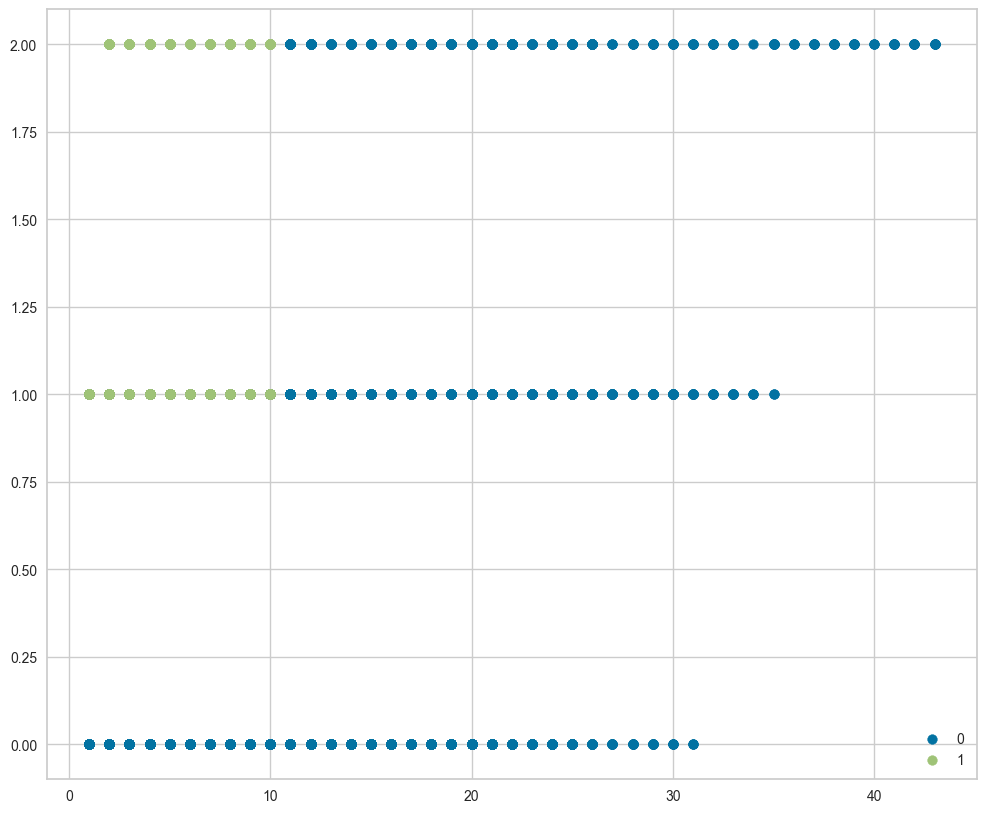

In [316]:
# scatter plot
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

In [317]:
# transform the dataset
smote = SMOTE()

In [318]:
# Buat Pipeline
from imblearn.pipeline import Pipeline

pipeline_relu_over = Pipeline([
    ('prep',scaler),
    ('ovs', smote),
    ('clf', classifier_relu)])

In [319]:
# Evaluasi relu dengan oversampling
np.seterr(under='ignore') # Untuk mengignore underflow error
evaluate_classifier_performance("MLP ReLU dengan Oversampling", pipeline_relu_over)

Hasil Evaluasi Model MLP ReLU dengan Oversampling Untuk Semua Fold

Penghitungan Makro dan Mikro pada Model Klasifikasi: 
Accuracy Average: 0.97
F1 Macro Average: 0.96
F1 Micro Average:  0.97
Precision Macro Average: 0.95
Precision Micro Average: 0.97
Recall Macro Average: 0.98
Recall Micro Average: 0.97



In [320]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [321]:
# Buat Pipeline
from imblearn.pipeline import Pipeline

pipeline_relu_under = Pipeline([
    ('prep',scaler),
    ('uns', undersample),
    ('clf', classifier_relu)])

In [322]:
# Evaluasi relu dengan oversampling
evaluate_classifier_performance("MLP ReLU dengan Undersampling", pipeline_relu_under)

Hasil Evaluasi Model MLP ReLU dengan Undersampling Untuk Semua Fold

Penghitungan Makro dan Mikro pada Model Klasifikasi: 
Accuracy Average: 0.97
F1 Macro Average: 0.95
F1 Micro Average:  0.97
Precision Macro Average: 0.92
Precision Micro Average: 0.97
Recall Macro Average: 0.97
Recall Micro Average: 0.97



### K-Means Clustering

#### Pemilihan Fitur

In [323]:
cluster_df = daegu_df[['SalePrice', 'Size(sqf)', 'Floor']]

Kode di atas bertujuan untuk memilih fitur yang akan digunakan untuk clustering. Pemilihan fitur didasarkan pada kondisi fisik dari apartemen beserta harga apartemen tersebut.

#### Penentuan Jumlah Cluster

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



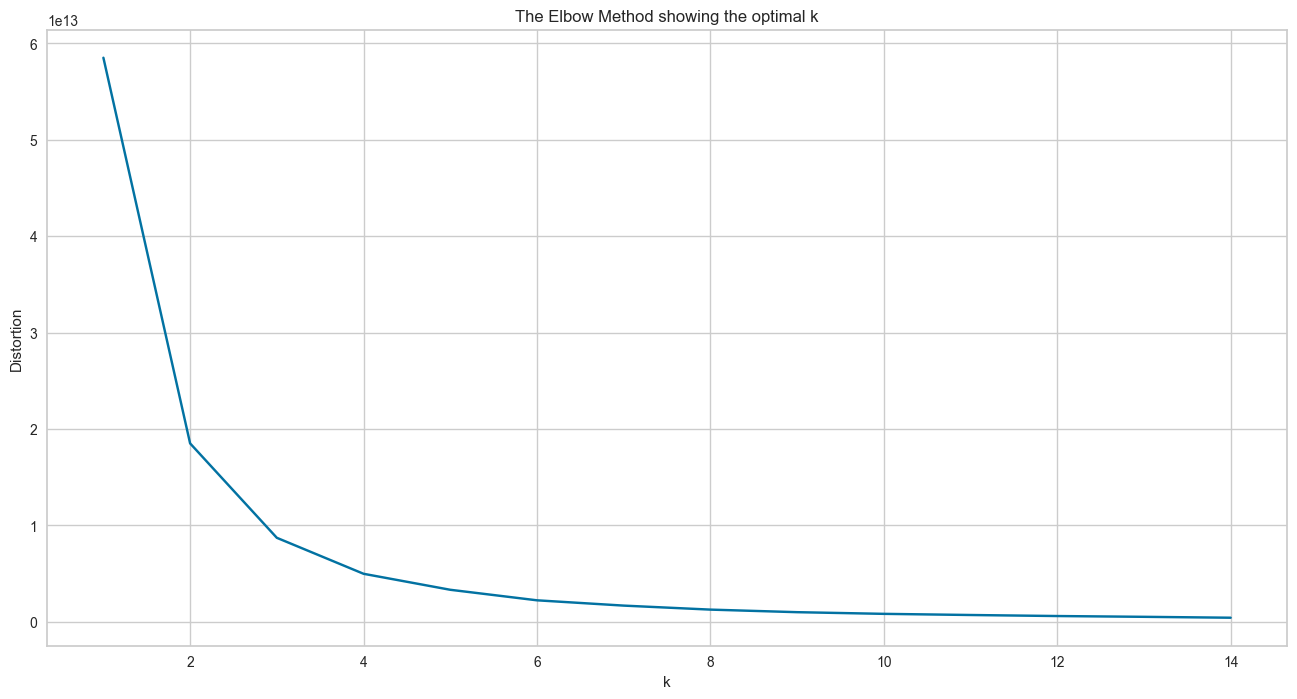

In [324]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Gambar di atas menunjukkan grafik elbow method untuk clustering dengan K-Means. Berdasarkan elbow method di atas terjadi perubahan signifikan saat jumlah cluster = 2 dan perubahan menjadi kurang signifikan setelah jumlah cluster > 4.  

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



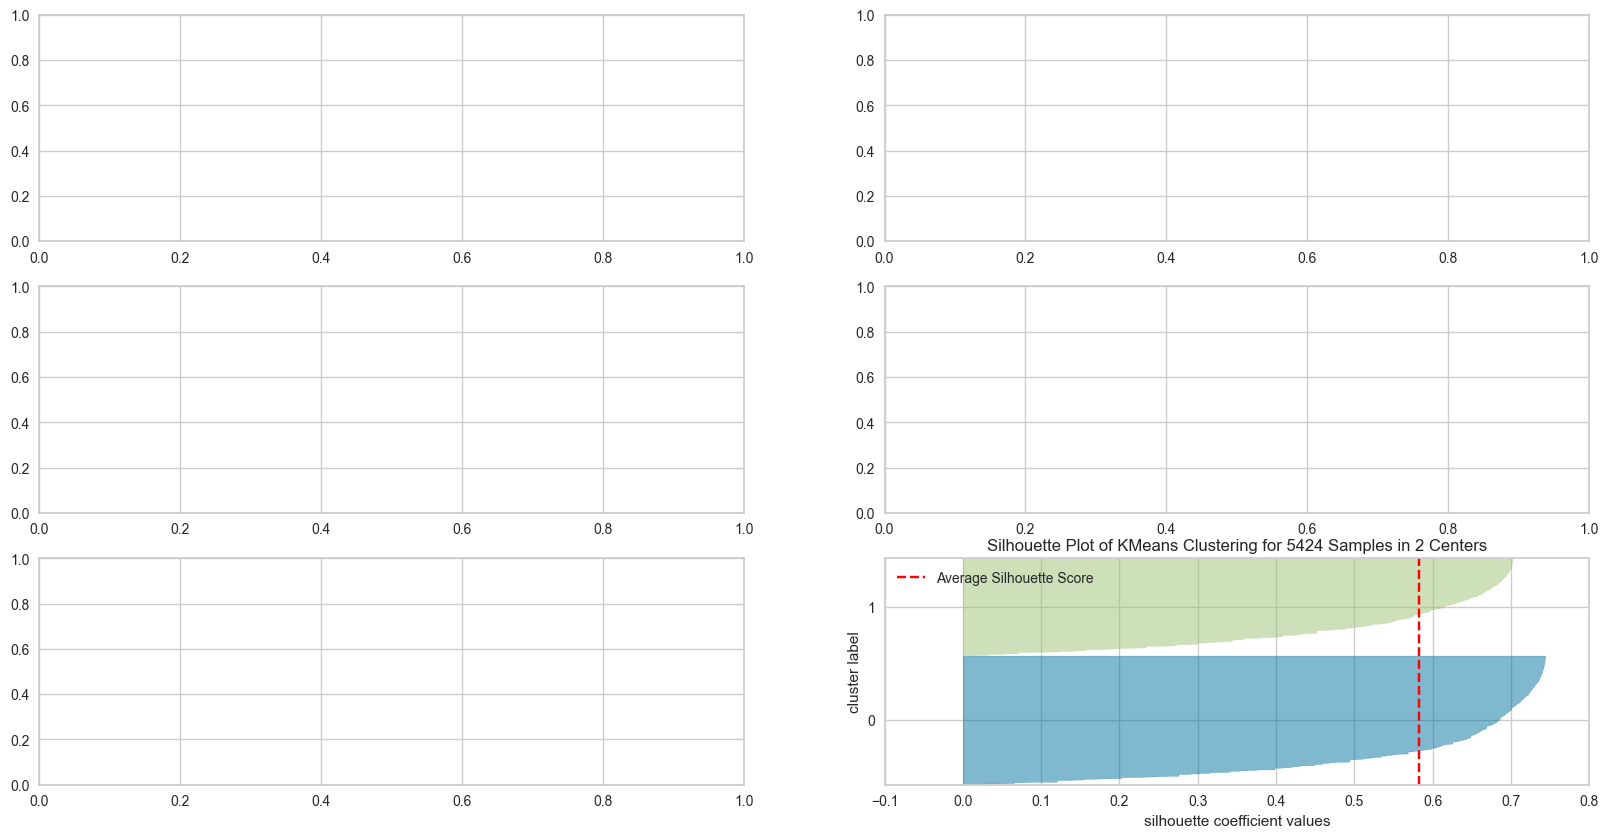

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_coefficient is : 0.5826480954290104


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



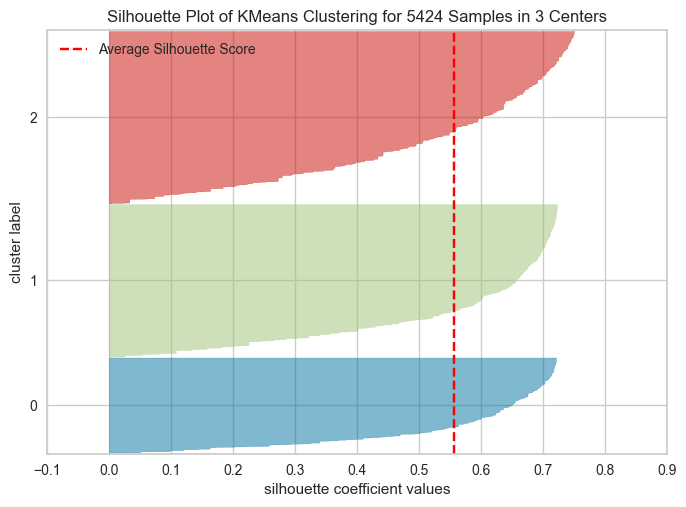

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 The average silhouette_coefficient is : 0.5572000509827894


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



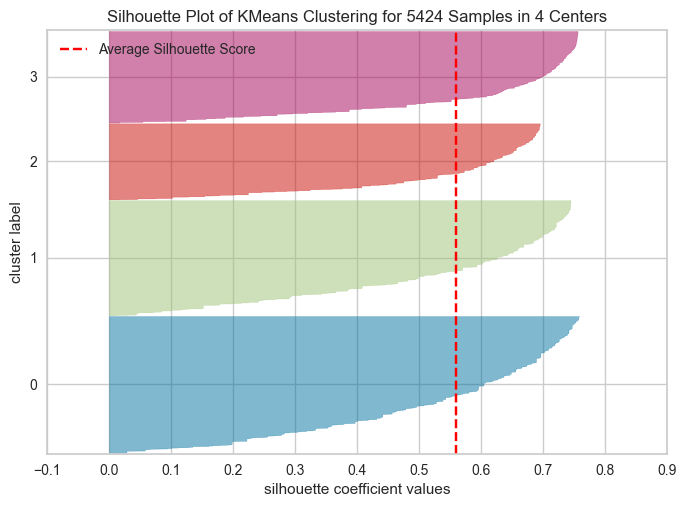

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_coefficient is : 0.5594133978467317


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



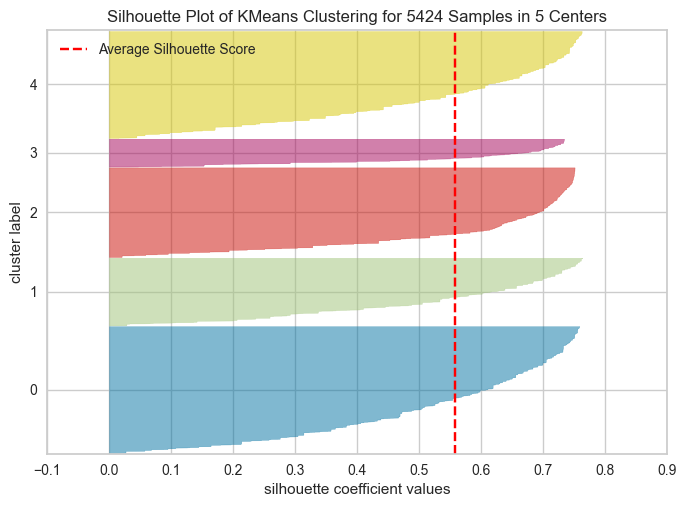

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5 The average silhouette_coefficient is : 0.5575210655643204


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



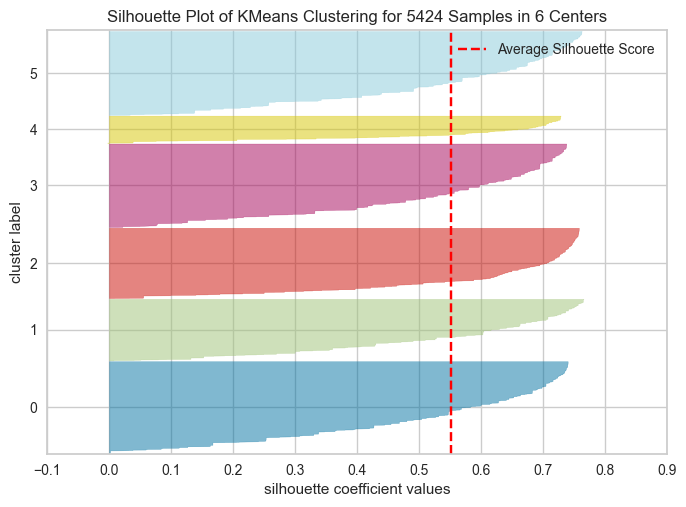

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6 The average silhouette_coefficient is : 0.551855404785801


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



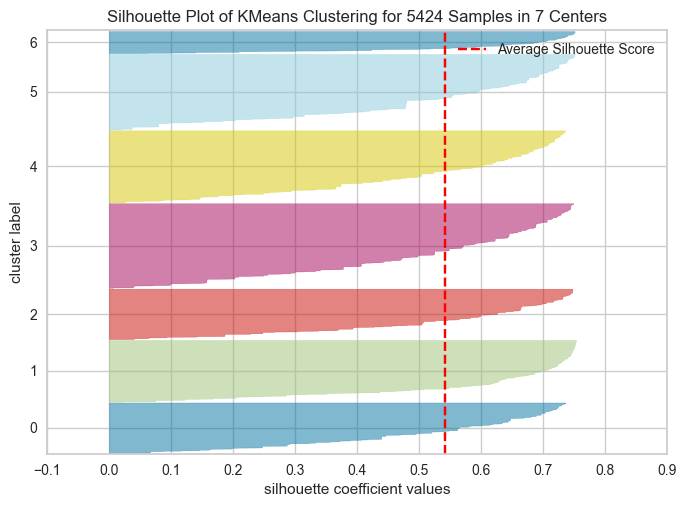

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7 The average silhouette_coefficient is : 0.5386471291896981


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



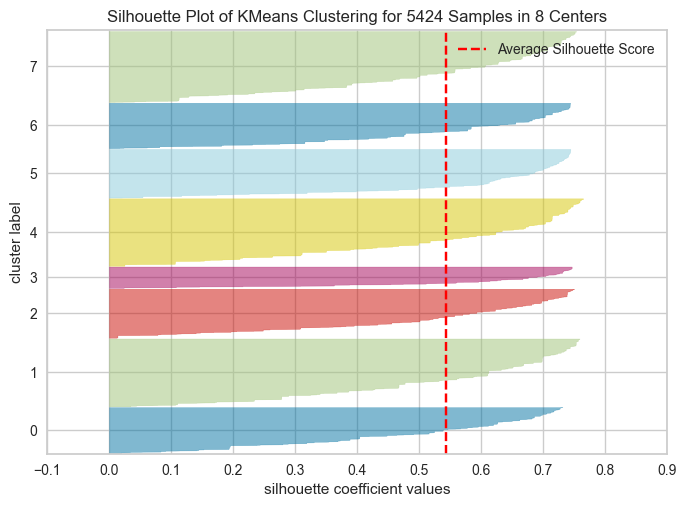

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8 The average silhouette_coefficient is : 0.5461105881279904


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



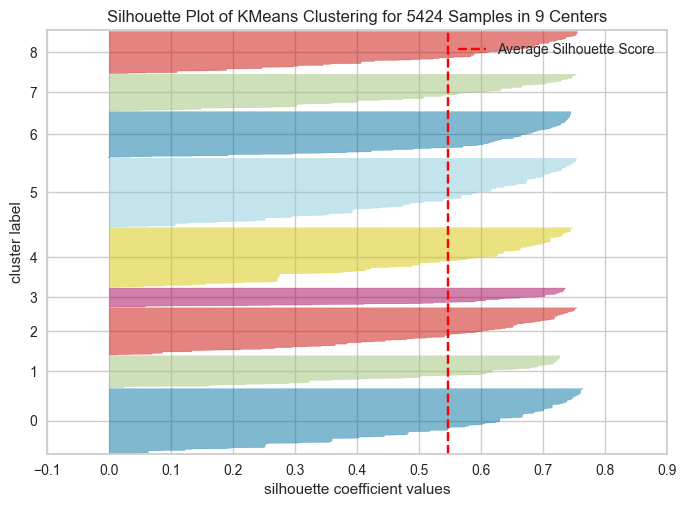

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9 The average silhouette_coefficient is : 0.5461544701193168


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



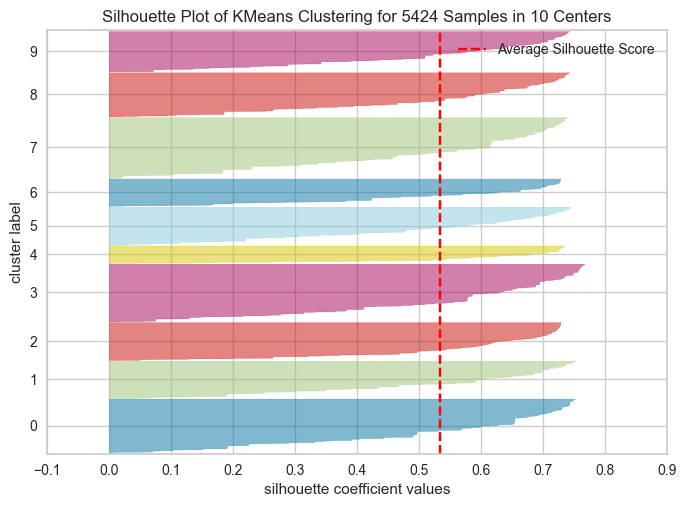

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 10 The average silhouette_coefficient is : 0.5364086408846034


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



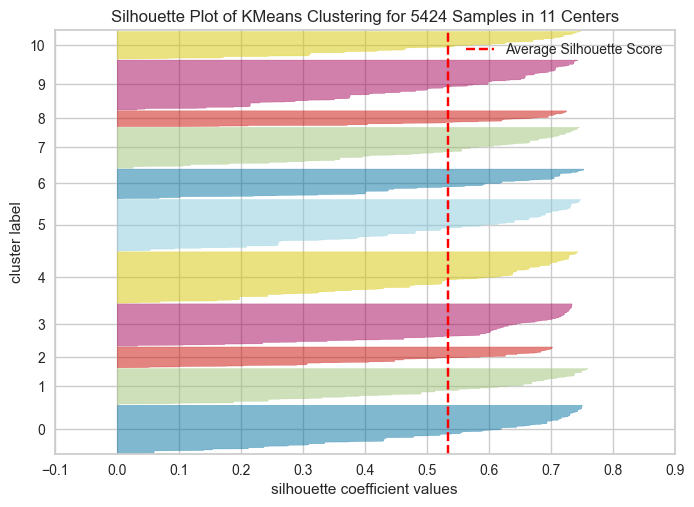

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 11 The average silhouette_coefficient is : 0.5333821556149392


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



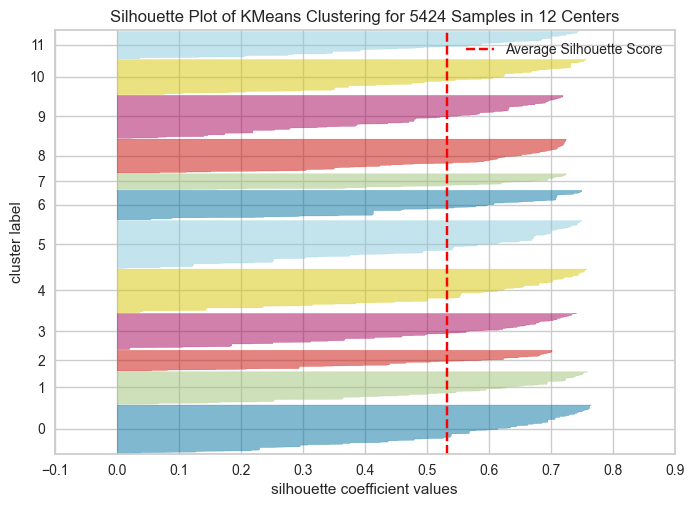

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 12 The average silhouette_coefficient is : 0.5303289651076044


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



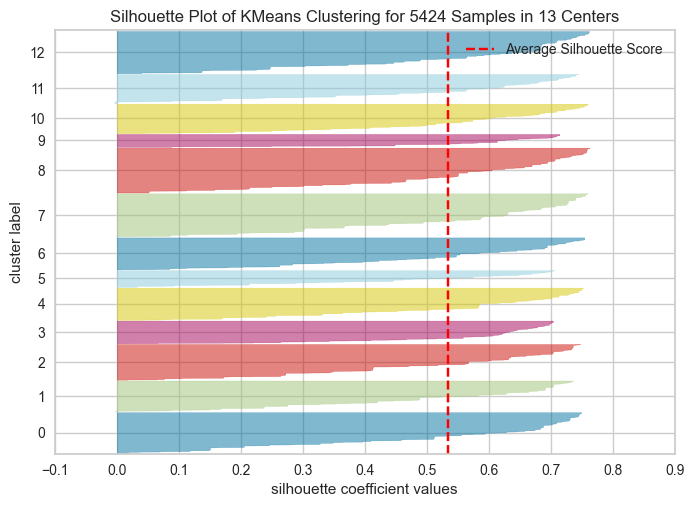

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 13 The average silhouette_coefficient is : 0.5398628489286114


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



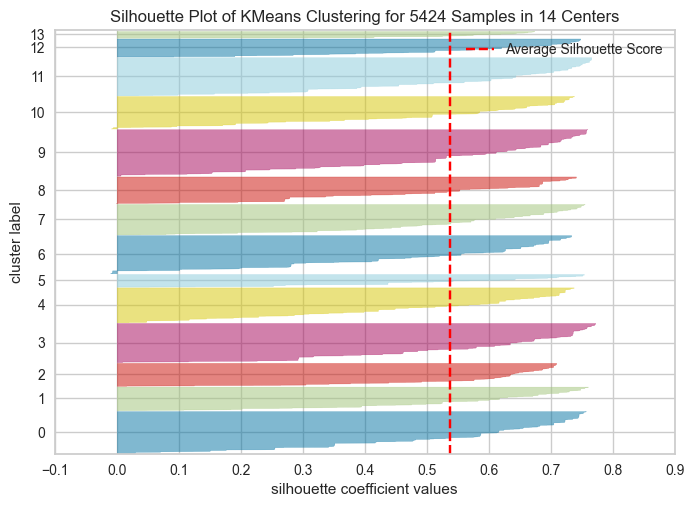

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 14 The average silhouette_coefficient is : 0.5341895442055017


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



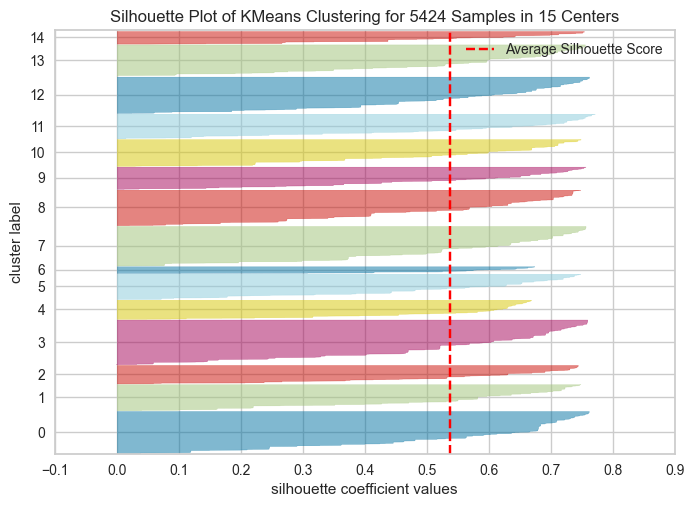

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 15 The average silhouette_coefficient is : 0.5283661971357015


In [325]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(20,10))
silhouette = []
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k)

    # Draw silhouette diagram
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick')
    visualizer.fit(cluster_df)
    visualizer.show()

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(cluster_df)
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

Pada kode di atas dilakukan perhitungan silhouette coefficient antara 2 - 15 cluster. Berdasarkan hasil perhitungan silhouette coefficient, didapatkan hasil bahwa jumlah cluster 2 memiliki silhouette coefficient terbesar. Selain itu, pembagian cluster juga terlihat paling merata di antara gambar jumlah cluster lainnya. Oleh karena itu, dipilih jumlah cluster / K = 2 untuk K-Means.

#### Membuat Model K-Means dengan jumlah cluster = 2

In [326]:
kmeans = KMeans(n_clusters=2)
cluster_assignment = kmeans.fit_predict(cluster_df)
data_with_clusters = pd.DataFrame(cluster_df.copy(), columns=('SalePrice', 'Size(sqf)', 'Floor'))
data_with_clusters['Clusters'] = cluster_assignment 
data_with_clusters

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,SalePrice,Size(sqf),Floor,Clusters
0,141592,814,3,0
1,51327,587,8,0
2,48672,587,6,0
4,221238,1761,3,0
5,35840,355,5,0
...,...,...,...,...
5886,511504,1643,19,1
5887,298230,903,13,1
5888,357522,868,20,1
5889,312389,1327,1,1


Dapat dilihat pada tabel di atas pembagian cluster dari setiap data.

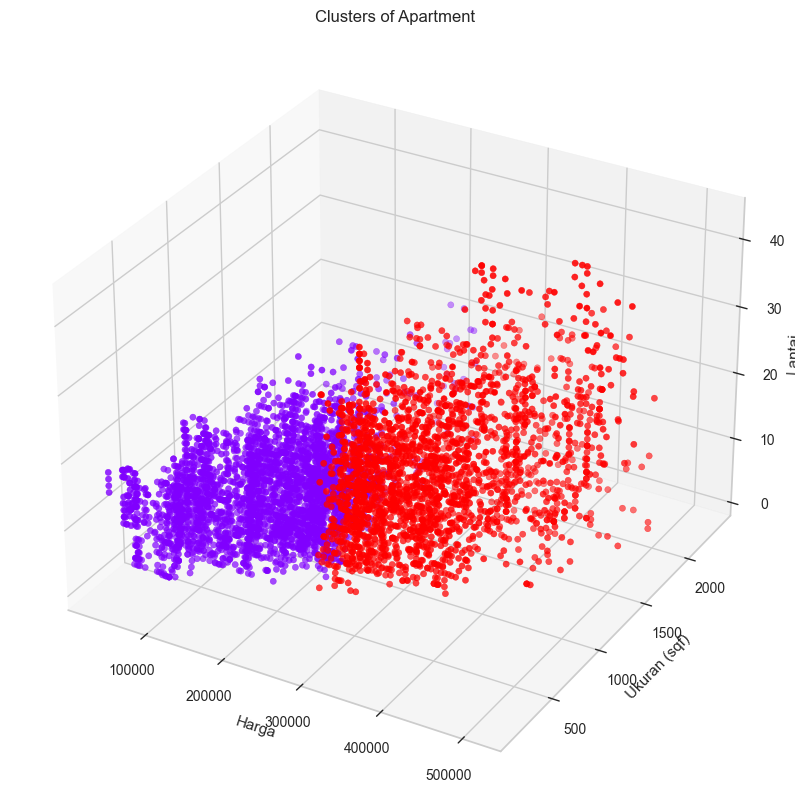

In [327]:
# Create figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Prepare data
x = data_with_clusters['SalePrice']
y = data_with_clusters['Size(sqf)']
z = data_with_clusters['Floor']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Clusters of Apartment")
ax.set_xlabel('Harga')
ax.set_ylabel('Ukuran (sqf)')
ax.set_zlabel('Lantai')

# Show plot
plt.show()

Dapat dilihat dari gambar di atas pembagian cluster pada bidang 3D.

In [328]:
jumlah_klaster = data_with_clusters.groupby(['Clusters']).size().rename('Cluster').reset_index()
data_jumlah_klaster = pd.DataFrame(jumlah_klaster)
data_jumlah_klaster

,Clusters,Cluster
0,0,3101
1,1,2323


Dapat dilihat dari tabel di atas jumlah apartemen pada setiap cluster. 

<AxesSubplot: ylabel='Cluster'>

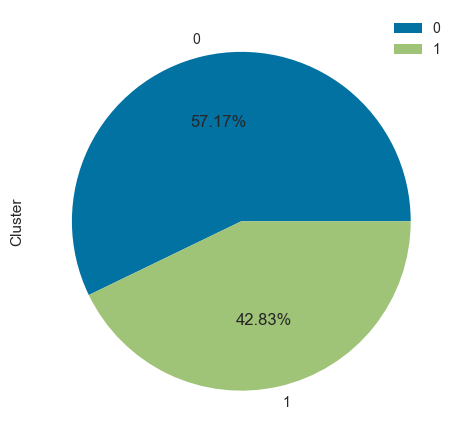

In [329]:
data_jumlah_klaster.plot(kind='pie', y='Cluster', autopct='%1.2f%%')

Dapat dilihat dari gambar pie chart di atas persentase dari kedua cluster.

#### Visualisasi Cluster Untuk Setiap Fitur

In [330]:
harga_klaster = data_with_clusters.groupby(['Clusters'])['SalePrice'].mean().reset_index()
data_harga_klaster = pd.DataFrame(harga_klaster)
data_harga_klaster

,Clusters,SalePrice
0,0,148941.496936
1,1,322494.064572


In [331]:
fig = px.bar(
    harga_klaster, 
    x="Clusters", 
    y="SalePrice", 
    title="Grafik rata-rata harga jual apartemen per cluster")
fig.show()

Tabel dan grafik di atas menunjukkan rata-rata harga jual dari kedua cluster.

In [332]:
ukuran_klaster = data_with_clusters.groupby(['Clusters'])['Size(sqf)'].mean().reset_index()
data_ukuran_klaster = pd.DataFrame(ukuran_klaster)
data_ukuran_klaster

,Clusters,Size(sqf)
0,0,800.904224
1,1,1173.165303


In [333]:
fig = px.bar(
    ukuran_klaster, 
    x="Clusters", 
    y="Size(sqf)", 
    title="Grafik rata-rata ukuran (sqf) apartemen per cluster")
fig.show()

Tabel dan grafik di atas menunjukkan rata-rata harga ukuran dari kedua cluster.

In [334]:
tinggi_klaster = data_with_clusters.groupby(['Clusters'])['Floor'].mean().reset_index()
data_tinggi_klaster = pd.DataFrame(tinggi_klaster)
data_tinggi_klaster

,Clusters,Floor
0,0,10.21090
1,1,14.49505


In [335]:
fig = px.bar(
    tinggi_klaster, 
    x="Clusters", 
    y="Floor", 
    title="Grafik rata-rata jumlah lantai apartemen per cluster")
fig.show()

Tabel dan grafik di atas menunjukkan rata-rata jumlah lantai dari kedua cluster.

### Agglomerative Clustering

#### Penentuan Jumlah Cluster

In [336]:
model_ac  = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')  
clustering = model_ac.fit(cluster_df)
clustering.labels_

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([3001, 3086, 3112, ...,    2,    1,    0], dtype=int64)

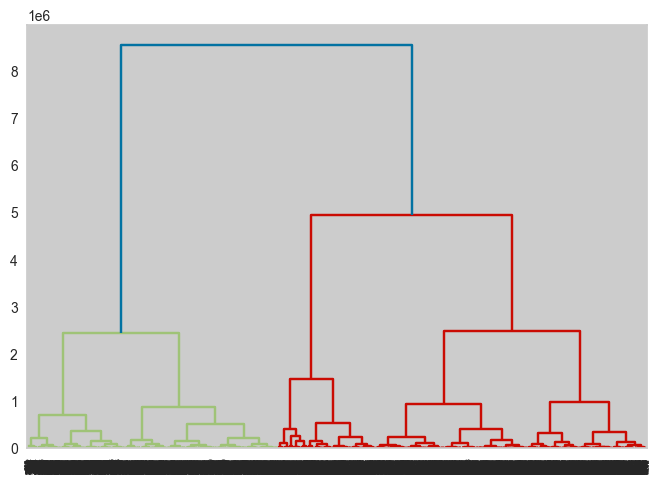

In [337]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(cluster_df, method='ward'))

Berdasarkan hasil dendrogram di atas, dapat dilihat bahwa garis vertikal terpanjang adalah garis yang menghubungkan dua buah cluster berwarna hijau dan merah sehingga dapat disimpulkan bahwa jumlah cluster optimal yang bisa didapatkan adalah 2 cluster.

#### Membuat Model Agglomerative Clustering

In [338]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')  
ac_clustering = clustering.fit_predict(cluster_df)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [339]:
data_with_clusters_ac = pd.DataFrame(cluster_df.copy(), columns=('SalePrice', 'Size(sqf)', 'Floor'))
data_with_clusters_ac['Clusters'] = ac_clustering
data_with_clusters_ac

,SalePrice,Size(sqf),Floor,Clusters
0,141592,814,3,1
1,51327,587,8,1
2,48672,587,6,1
4,221238,1761,3,0
5,35840,355,5,1
...,...,...,...,...
5886,511504,1643,19,0
5887,298230,903,13,0
5888,357522,868,20,0
5889,312389,1327,1,0


Tabel di atas menunjukkan data apartemen beserta pengelompokkan tiap data ke dalam cluster sesuai agglomerative clustering model.

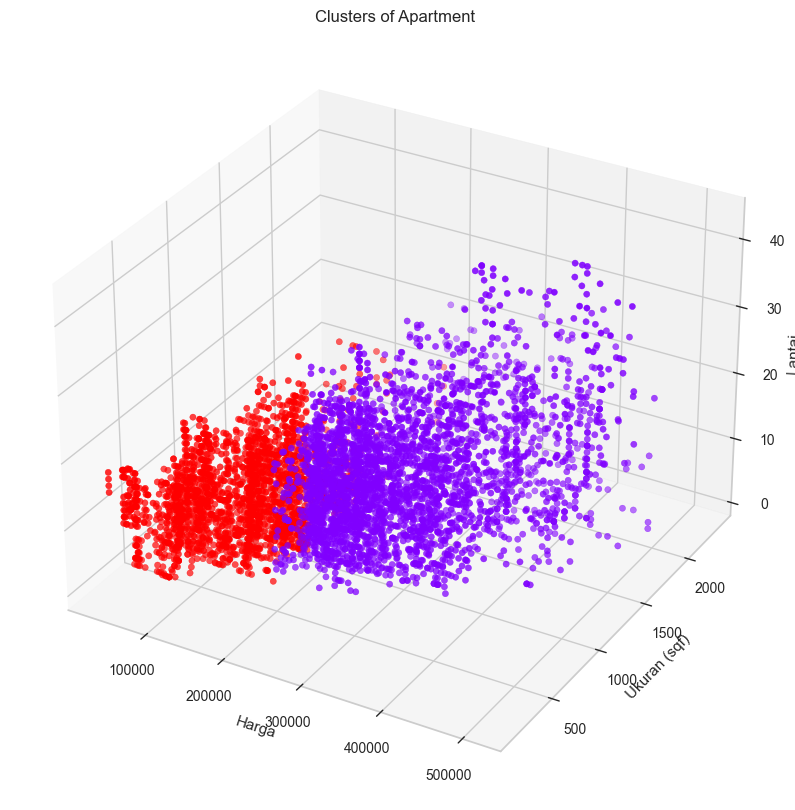

In [340]:
# Create figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Prepare data
x = data_with_clusters_ac['SalePrice']
y = data_with_clusters_ac['Size(sqf)']
z = data_with_clusters_ac['Floor']
cluster = data_with_clusters_ac['Clusters']

# Create plot
ax.scatter(x, y, z, c = clustering.labels_, cmap = "rainbow")
plt.title("Clusters of Apartment")
ax.set_xlabel('Harga')
ax.set_ylabel('Ukuran (sqf)')
ax.set_zlabel('Lantai')

# Show plot
plt.show()

Gambar di atas menunjukkan pembagian cluster apartemen pada bidang 3D.

In [341]:
jumlah_klaster_ac = data_with_clusters_ac.groupby(['Clusters']).size().rename('Cluster').reset_index()
data_jumlah_klaster_ac = pd.DataFrame(jumlah_klaster_ac)
data_jumlah_klaster_ac

,Clusters,Cluster
0,0,3233
1,1,2191


Tabel di atas menunjukkan jumlah apartemen pada setiap cluster.

<AxesSubplot: ylabel='Cluster'>

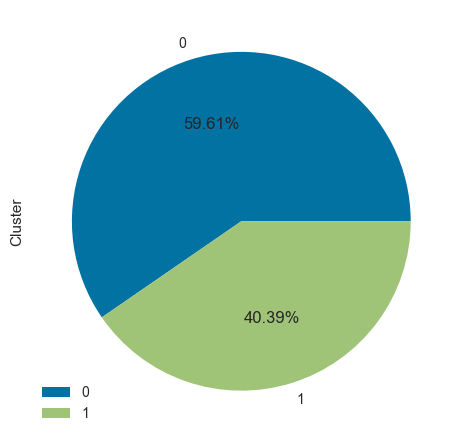

In [342]:
data_jumlah_klaster_ac.plot(kind='pie', y='Cluster', autopct='%1.2f%%')

Pie Chart di atas menunjukkan persentase pembagian apartemen pada setiap cluster.

In [343]:
harga_klaster_ac = data_with_clusters_ac.groupby(['Clusters'])['SalePrice'].mean().reset_index()
data_harga_klaster_ac = pd.DataFrame(harga_klaster_ac)
data_harga_klaster_ac

,Clusters,SalePrice
0,0,290894.347355
1,1,123486.932451


In [344]:
fig = px.bar(
    harga_klaster_ac, 
    x="Clusters", 
    y="SalePrice", 
    title="Grafik rata-rata harga jual apartemen per cluster")
fig.show()

Tabel dan grafik di atas menunjukkan rata-rata harga jual dari kedua cluster.

In [345]:
ukuran_klaster_ac = data_with_clusters_ac.groupby(['Clusters'])['Size(sqf)'].mean().reset_index()
data_ukuran_klaster_ac = pd.DataFrame(ukuran_klaster_ac)
data_ukuran_klaster_ac

,Clusters,Size(sqf)
0,0,1119.905970
1,1,724.879507


In [346]:
fig = px.bar(
    ukuran_klaster_ac, 
    x="Clusters", 
    y="Size(sqf)", 
    title="Grafik rata-rata ukuran (sqf) apartemen per cluster")
fig.show()

Tabel dan grafik di atas menunjukkan rata-rata ukuran apartemen dari kedua cluster.

In [347]:
tinggi_klaster_ac = data_with_clusters_ac.groupby(['Clusters'])['Floor'].mean().reset_index()
data_tinggi_klaster_ac = pd.DataFrame(tinggi_klaster_ac)
data_tinggi_klaster_ac

,Clusters,Floor
0,0,13.559852
1,1,9.811502


In [348]:
fig = px.bar(
    tinggi_klaster_ac, 
    x="Clusters", 
    y="Floor", 
    title="Grafik rata-rata jumlah lantai apartemen per cluster")
fig.show()

Tabel dan grafik di atas menunjukkan rata-rata jumlah lantai apartemen dari kedua cluster.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=455ce48e-6e90-4936-ac85-af3ac4c7c66a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>